<h1>Sumário<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset:-Transactions.csv" data-toc-modified-id="Dataset:-Transactions.csv-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset: Transactions.csv</a></span><ul class="toc-item"><li><span><a href="#Pré-processamento" data-toc-modified-id="Pré-processamento-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Pré-processamento</a></span></li><li><span><a href="#Predição-do-número-de-transações" data-toc-modified-id="Predição-do-número-de-transações-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Predição do número de transações</a></span><ul class="toc-item"><li><span><a href="#Predições-com-o-BG/NBD" data-toc-modified-id="Predições-com-o-BG/NBD-1.2.1"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Predições com o BG/NBD</a></span></li><li><span><a href="#Predições-com-o-Pareto/NBD" data-toc-modified-id="Predições-com-o-Pareto/NBD-1.2.2"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Predições com o Pareto/NBD</a></span></li></ul></li><li><span><a href="#Função-de-predição-de-frequência-de-compras" data-toc-modified-id="Função-de-predição-de-frequência-de-compras-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Função de predição de frequência de compras</a></span></li><li><span><a href="#Gráficos-relacionados-a-frequência" data-toc-modified-id="Gráficos-relacionados-a-frequência-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Gráficos relacionados a frequência</a></span></li><li><span><a href="#Calculando-o-valor-monetário" data-toc-modified-id="Calculando-o-valor-monetário-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Calculando o valor monetário</a></span></li><li><span><a href="#Calculo-do-lifetime-Value" data-toc-modified-id="Calculo-do-lifetime-Value-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Calculo do lifetime Value</a></span><ul class="toc-item"><li><span><a href="#Solução-do-lifetimes" data-toc-modified-id="Solução-do-lifetimes-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Solução do lifetimes</a></span></li><li><span><a href="#Solução-elaborada" data-toc-modified-id="Solução-elaborada-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Solução elaborada</a></span></li></ul></li></ul></li><li><span><a href="#Dataset:-Olist" data-toc-modified-id="Dataset:-Olist-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset: Olist</a></span></li><li><span><a href="#Dataset:-Shopping-Data" data-toc-modified-id="Dataset:-Shopping-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Dataset: Shopping Data</a></span></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time
from datetime import timedelta

import Churn.Churn as Churn

np.seterr(divide = 'ignore') 


{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
arquivoTransactions = "Arquivos/transactions.csv"
arquivoOlist = "Arquivos/dataset_Olist.csv"
arquivoShopping = "Arquivos/datasetShopping.csv"

churnTeste = "churnRecente"

# Dataset: Transactions.csv

Falar sobre este dataset

In [3]:
df = pd.read_csv(arquivoTransactions)
df['date'] = pd.to_datetime(df['date'])
df

,a,customer_id,customer_index,date,quantity,amount
0,0,4,1,1997-01-01,2,29.33
1,1,4,1,1997-01-18,2,29.73
2,2,4,1,1997-08-02,1,14.96
3,3,4,1,1997-12-12,2,26.48
4,4,21,2,1997-01-01,3,63.34
...,...,...,...,...,...,...
6914,6914,23556,2356,1997-07-26,3,45.74
6915,6915,23556,2356,1997-09-27,3,31.47
6916,6916,23556,2356,1998-01-03,2,28.98
6917,6917,23556,2356,1998-06-07,2,28.98


## Pré-processamento

Abaixo, podemos visualizar como é o fluxo dos dados:

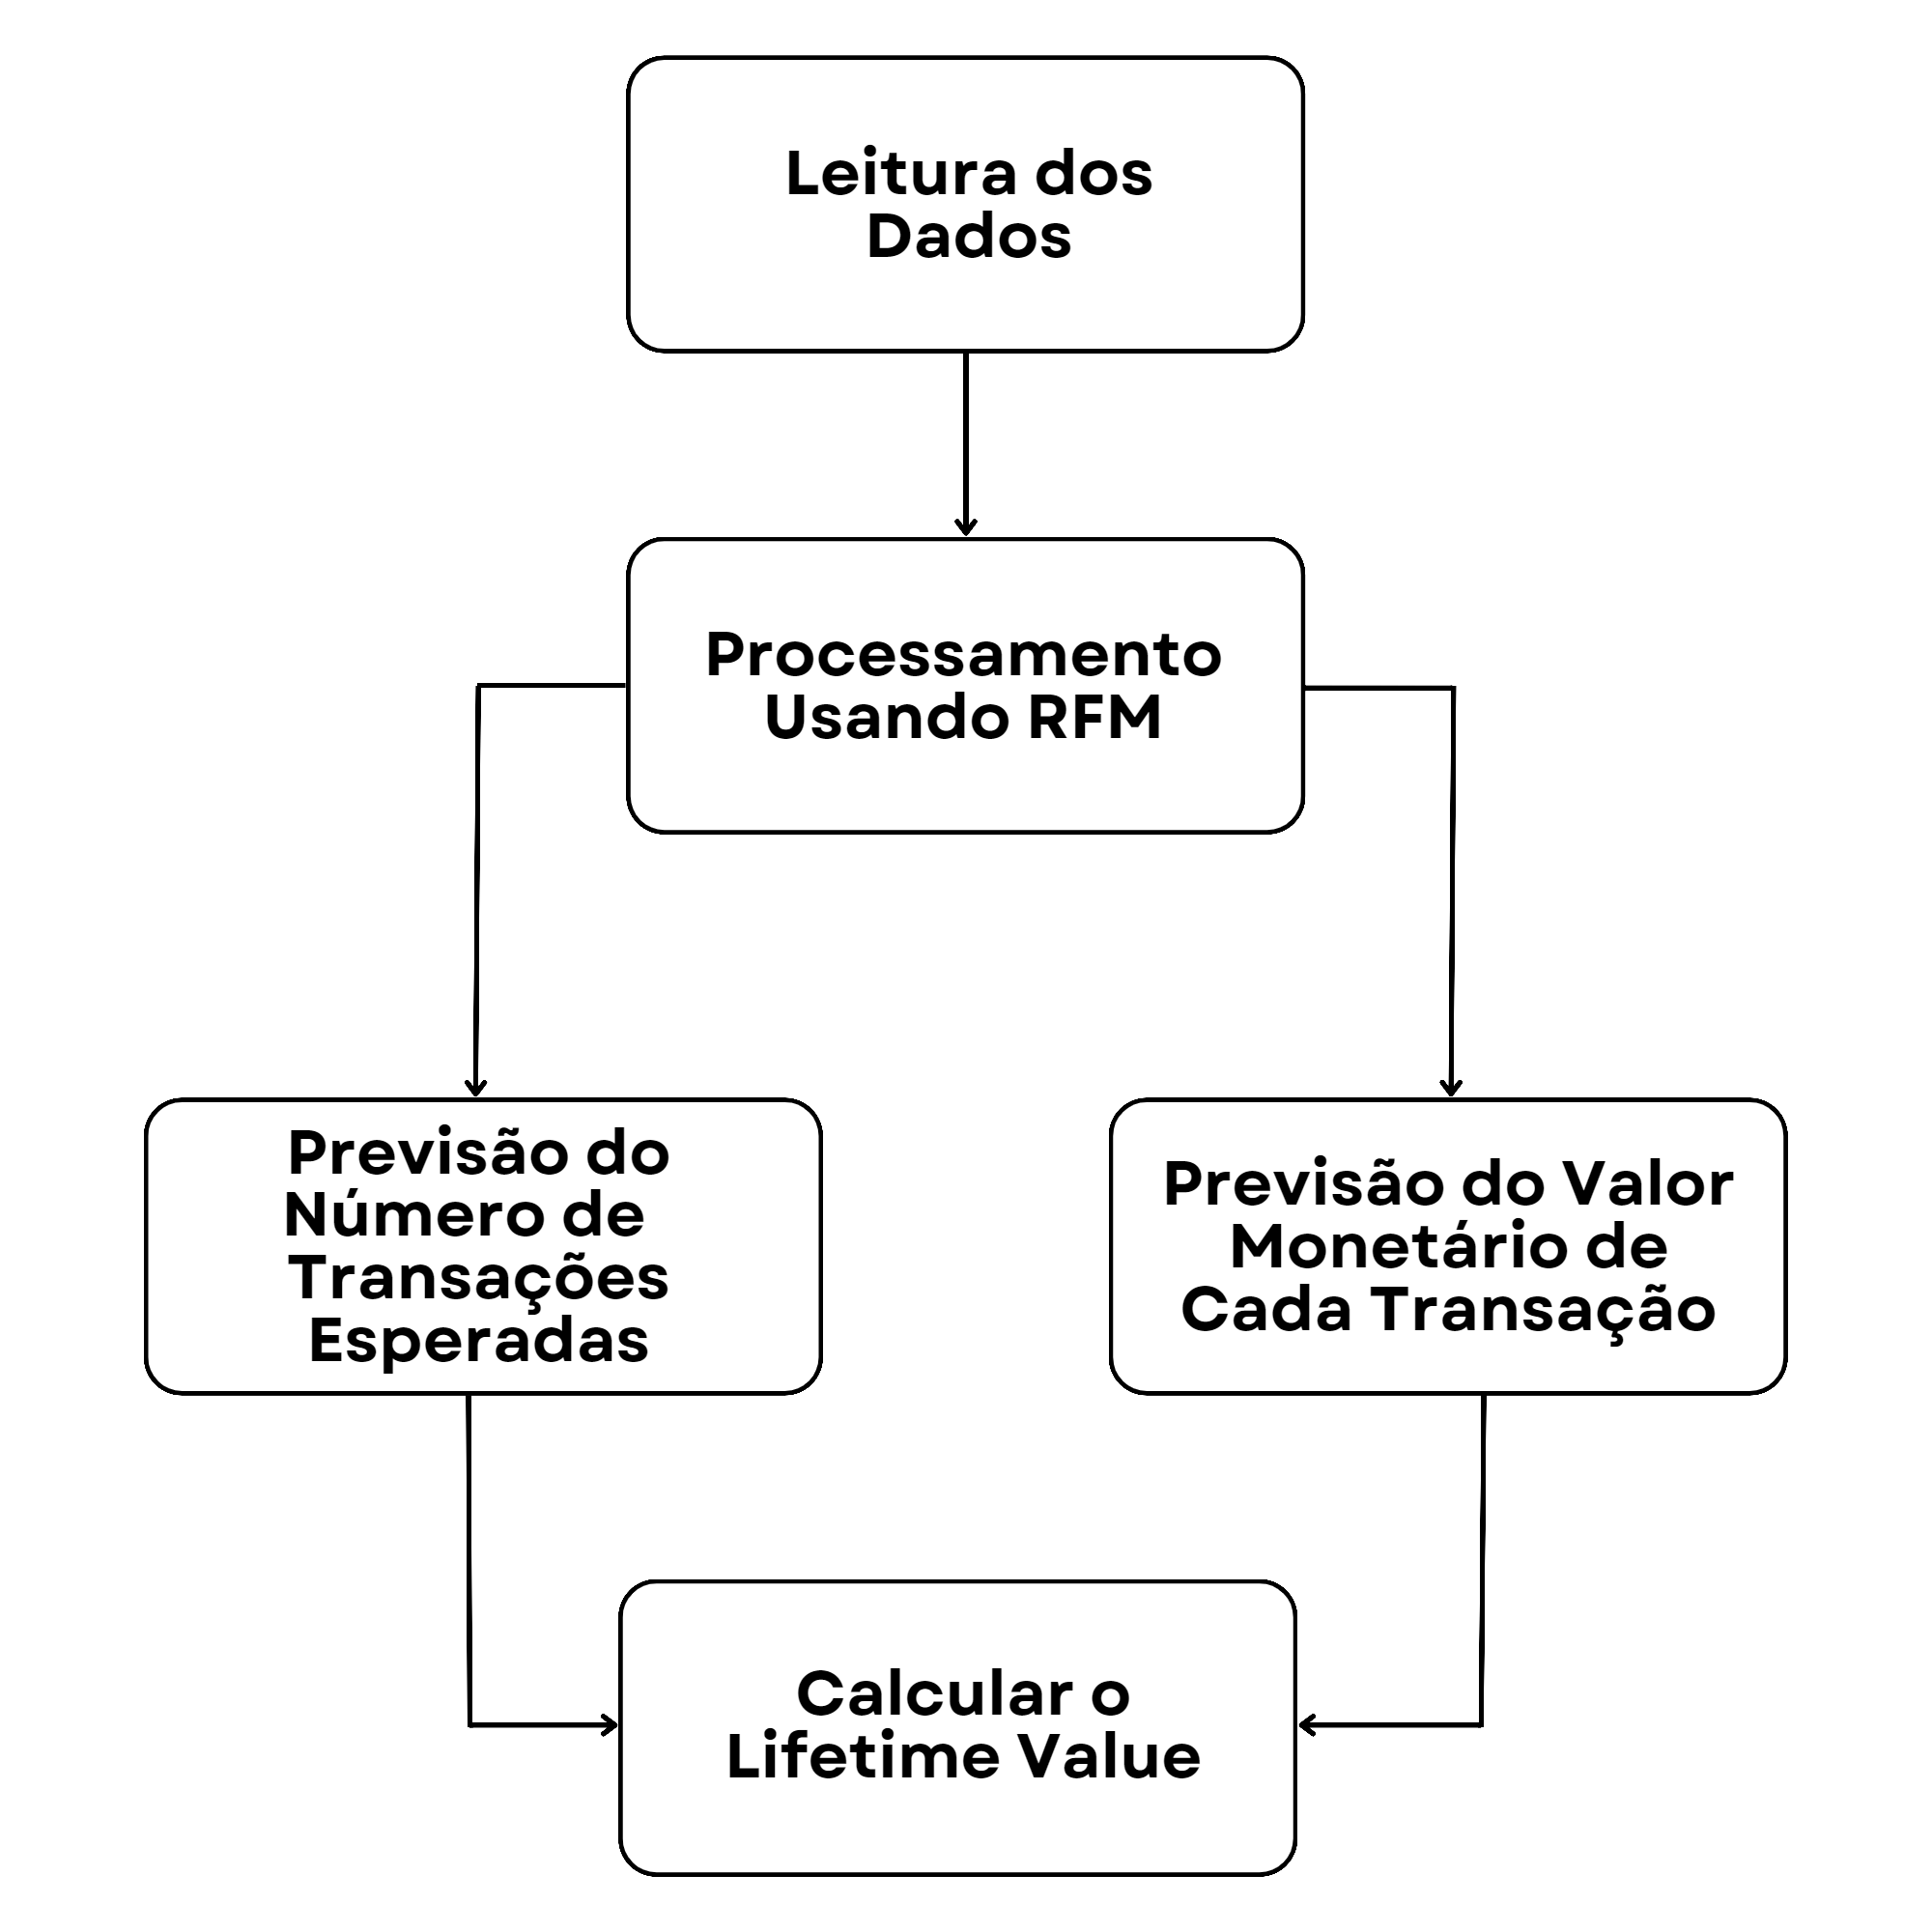

Nesta etapa, definimos as funções que serão usadas para o pré-processamento.

Para realizar o treinamento dos dados é necessário fazer uma separação em treino e teste. Baseando-se nisso, foi escolhido realizar esta separação de acordo com a data das transações, sendo que as 80\% transações mais  antigas serão utilizadas para o treinamento e validação dos modelos, e o restante para testes, tanto para os modelos de aprendizado de máquina quanto para os probabilísticos da literatura. Estes períodos podem ser chamados também de período de calibração (treino e validação) e observação (teste).
A primeira função, é necessária para obter qual será a data de divisão do dataset.

In [4]:
#Baseado no dataframe passado, e na frequência, divide os dados de acordo com a porcentagem passada.
#Retorna qual é a data correspondente à aquela divisão passada no split, e a ultima data da separação
def getPeriodos(df, #Dataframe do Pandas 
                colunaData, #Nome da coluna onde estão as datas
                frequencia, #Frequência em que será observado, Ex: "W" - Weeks
                split = 0.8 #Porcentagem da divisão dos dados para separar em treino e calibração
               ):
    primeiraData = df[colunaData].sort_values().values[0]
    ultimaData = df[colunaData].sort_values().values[-1]
    rangeDatas = pd.date_range(start=primeiraData,end=ultimaData,freq=frequencia)
    indiceCorte = round(len(rangeDatas) * split)
    return rangeDatas[indiceCorte],ultimaData

getPeriodos(df,'date','W',0.8)

(Timestamp('1998-03-15 00:00:00'),
 numpy.datetime64('1998-06-30T00:00:00.000000000'))

Para todas as funções, é necessário processar o dataset usando o padrão RFMT. Para isto, cria-se a função abaixo:

In [5]:
from lifetimes.utils import calibration_and_holdout_data,summary_data_from_transaction_data
from datetime import datetime

#Processa um dataset de acordo com o padrão RFMT
# O retorno desta função consiste em:
#Se teste for true : Retorna o dataset considerando a data de divisão para dividir o período de 'calibração' e 'holdout'.
#Se for falso: Retorna todo o dataset processado pelo padrão RFMT.
def processarRFM(arquivo #Nome do arquivo
                 ,colunaID #Nome da coluna onde encontra-se os identificadores
                 ,colunaData  #Nome da coluna onde encontra-se as datas
                 ,colunaValor  #Nome da coluna onde encontra-se os valores monetários
                 ,frequencia = 'W' #Frequência em que será observado, Ex: "W" - Weeks
                 ,calibrationEnd = None #Caso queira passar a data do fim do período de calibração
                 ,ObservationEnd = None #Caso queira passar a data do fim do período de Obsersvação
                 ,split = 0.8 # Porcentagem da divisão dos dados para separar em Obsersvação e calibração
                 , teste = True #Verdadeiro caso queira separar os dados em Obsersvação e calibração
                ):
    df = pd.read_csv(arquivo)
    df = df.dropna()
    
    if calibrationEnd == None:
        calibrationEnd,ObservationEnd = getPeriodos(df,colunaData,frequencia,split)
        
    if teste == False:
        rfm_cal_holdout = summary_data_from_transaction_data(transactions=df,
                                                  customer_id_col=colunaID, 
                                                   datetime_col=colunaData,
                                                   monetary_value_col = colunaValor,
                                                   freq=frequencia)
        dataFinal = ObservationEnd
    else:
        rfm_cal_holdout = calibration_and_holdout_data(transactions=df,
                                                  customer_id_col=colunaID, 
                                                   datetime_col=colunaData,
                                                   monetary_value_col = colunaValor,
                                                   freq=frequencia,
                                                   calibration_period_end=calibrationEnd,
                                                   observation_period_end=ObservationEnd)
        dataFinal = calibrationEnd.strftime('%Y-%m-%d')

    dataInicial = pd.to_datetime(df[colunaData]).dt.date.min().strftime('%Y-%m-%d')
    churn = Churn.calculaAllChurn( arquivo, colunaID, colunaData, dataInicial, dataFinal, frequencia )
    rfm_cal_holdout = pd.concat([rfm_cal_holdout, churn], axis=1)

    return rfm_cal_holdout.fillna(0.0)

rfm = processarRFM(arquivoTransactions,'customer_id','date','amount')
rfm.head(3)

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 5.15 segundos



,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente
4,3.0,49.0,62.0,23.723333,0.0,0.0,16.0,0.958752,0.999939,0.999999,0.950820
18,0.0,0.0,62.0,0.000000,0.0,0.0,16.0,1.000000,1.000000,1.000000,1.000000
21,1.0,2.0,62.0,11.770000,0.0,0.0,16.0,0.999471,1.000000,1.000000,0.983607


A recência $R$ consiste no tempo de atividade do cliente quando ele fez a última compra. Isso é igual ao intervalo entre a primeira compra de um cliente e sua última compra na unidade de tempo escolhida.

$$ R_i = d_x - d_1$$

A frequência $F$  representa o número de compras  que o cliente fez, porém, subtraí-se um do número total de compras, para que assim, clientes que são considerados One-time-buyers(Um consumidor que compra apenas um produto ou serviço de uma empresa), sejam facilmente detectados, portanto: 

$$ F_i = x - 1 $$


O valor monetário $M$ representa o valor médio das compras de um determinado cliente. Isso é igual à soma de todas as compras de um cliente dividida pelo número total de compras.

$$ M_i = \overline{z} = \sum\limits_{i=1}^{\mbox{x}} z_i / x $$

$T$, oriundo de Time, representa quanto tempo o cliente existe até o final do tempo de observação $d_y$ . Isso equivale à duração entre a primeira compra de um cliente e o final do período em estudo.

$$ T_i = d_y - d_1 $$

## Predição do número de transações

O processo de estimar o número de transações esperadas consiste em, baseado nos valores retornados do Modelo RFMT, estimar o número de transações que um determinado cliente irá realizar no horizonte de tempo esperado. Iremos utilizar três abordagens:

* BG/NBD
* Pareto/NBD
* Utilizar Aprendizado de Máquina

Para estimar o número de transações, foram utilizados os atributos fornecidos pelo RFMT, além de qual o horizonte de tempo esperado para realizar a previsão. O alvo deste modelo consiste no número de transações que este cliente irá realizar no futuro.
Para isto, utiliza-se 70\% dos dados do período de calibração para treino, e os 30\% restante para validação com o objetivo de definir qual dos algoritmos e respectivos hiperparâmetros obtêm um melhor desempenho. 

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error

#Função utilizada para criar os modelos de regressão
#Retorna o MSE e o modelo
def createModelRegressor(RegressorModel #Modelo que será treinado (Tem de ter a função fit e predict implementadas)
                         , X_train #Dados que serão usados para o treino
                         , X_test #Dados que serão usados para o teste
                         , Y_train #Targets dos dados de treino
                         , Y_test #Targets dos dados de testes
                        ): 
    regressor = RegressorModel
    regressor.fit(X_train, Y_train)
    pred = regressor.predict(X_test)
    mse = mean_squared_error(Y_test, pred) #Utilizando o MSE, caso queira outra métrica, trocar nesta parte!
    return mse, regressor #Retorna o MSE e o Regressor

In [7]:
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor,  GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import ParameterSampler

import xgboost as xgb
import lightgbm as lgb

from sklearn.model_selection import GridSearchCV


#Função feita para escolher o melhor modelo de acordo com a situação
#Retorna o melho modelo para a situação
def escolheModelo(dfRFM #Dataframe já processado pelo RFM
                  ,target = 'monetary_value_holdout' #Nome da coluna de target, sendo a coluna de valor monetário prevista ou frequência
                  , tunning = False #Caso queira fazer o Tunning de hyperparâmetros, deixar como true
                 ):
    #Colunas utilizadas para treino
    Xcol = ['frequency_cal', 'recency_cal', 'T_cal', 'monetary_value_cal','duration_holdout', churnTeste]
    #Colunas utilizadas para target
    Ycol = [target]

    X = dfRFM[Xcol]
    Y = dfRFM[Ycol]

    X_train, X_test, Y_train, Y_test = train_test_split(X.values, np.ravel(Y.values), random_state=42)
    
    if tunning == False:
        lasso = LassoCV()
        Enet = ElasticNet()
        rf = RandomForestRegressor()
        krr = KernelRidge()
        GBoost = GradientBoostingRegressor()
        HGBoost = HistGradientBoostingRegressor()
        model_xgb = xgb.XGBRegressor()
        model_lgb = lgb.LGBMRegressor(objective='regression')
    
    else:
        #lasso = LassoCV()
        grid = {'n_alphas' : [100,200,500,100],'max_iter' : [1000,1500,2000], 'random_state' : [42]}
        lasso = GridSearchCV(estimator=LassoCV(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")

        grid = {"max_iter": [1000,1500,2000],"alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],"l1_ratio": np.arange(0.0, 1.0, 0.1), 'random_state' : [42]}
        Enet = GridSearchCV(estimator=ElasticNet(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")
        #Enet = ElasticNet()

        grid = {'bootstrap': [True, False],'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10], 'n_estimators': [200, 800, 1000],'random_state' : [42]}    
        rf = GridSearchCV(estimator=RandomForestRegressor(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")
        #rf = RandomForestRegressor()

        grid = {"alpha": [0.001, 0.01, 0.1, 1,], "coef0" : [0.01,0.1,1,10,100] ,'degree_': [1,3,5,10],'random_state':[42]}
        krr = GridSearchCV(estimator=KernelRidge(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")
        #krr = KernelRidge()

        grid = {'n_estimators':[500,1000,2000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[42]}
        GBoost = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")
        #GBoost = GradientBoostingRegressor()
        grid = {'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4,None],'max_leaf_nodes' : [31,None],'random_state':[42]}

        HGBoost = GridSearchCV(estimator=HistGradientBoostingRegressor(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")
        #HGBoost = HistGradientBoostingRegressor()

        grid = { 'max_depth': [3,6,10],'learning_rate': [0.01, 0.05, 0.1],'n_estimators': [100, 500, 1000],'colsample_bytree': [0.3, 0.7],'random_state':[42]}
        #model_xgb = xgb.XGBRegressor()
        model_xgb = GridSearchCV(estimator=xgb.XGBRegressor(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")
        #model_lgb = lgb.LGBMRegressor(objective='regression')
        model_lgb =GridSearchCV(estimator=lgb.LGBMRegressor(), param_grid=grid, n_jobs=-1, scoring="neg_mean_squared_error")
    
    
    models = [lasso, Enet, rf, GBoost, HGBoost, model_xgb, model_lgb]#,krr]

    bestModel, bestScore = None, None
    for i in models:
        score = createModelRegressor(i, X_train, X_test, Y_train, Y_test)
        if bestScore == None or bestScore > score[0]:
            bestScore, bestModel = score
        if tunning:
            print(type(i.best_estimator_).__name__, " mse: {:.4f} \n".format(score[0]))
        else:
            print(type(i).__name__, " mse: {:.4f} \n".format(score[0]))

    if tunning :
        return bestModel.best_estimator_
    else:
        return bestModel
    #prediction = bestModel.predict(X_test[Xcol])
    #X_test['ExpectedML'] = prediction
    #X_test['Real Expected'] = Y_test
    #return X_test


escolheModelo(rfm)



LassoCV  mse: 150.2791 

ElasticNet  mse: 150.5470 

RandomForestRegressor  mse: 189.2330 

GradientBoostingRegressor  mse: 208.4949 

HistGradientBoostingRegressor  mse: 171.8451 

XGBRegressor  mse: 291.7941 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000878 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 452
[LightGBM] [Info] Number of data points in the train set: 1767, number of used features: 5
[LightGBM] [Info] Start training from score 5.724801
LGBMRegressor  mse: 190.9616 



LassoCV()

### Predições com o BG/NBD

In [8]:
from lifetimes import BetaGeoFitter

# Função para criar o modelo BG/NBD
def criarModeloBGF(dadosRFM #Dataset já processado pelo RFM
                   ,teste = True #Caso seja para efetuar a predição em um dataset com ou sem o período de observação
                   ,penalizer = 0.1# Coeficiente de penalização usado pelo modelo
                  ):
    # instantiation of BG-NBD model
    bgf = BetaGeoFitter(penalizer_coef=penalizer)

    # fitting of BG-NBD model
    if teste:
        bgf.fit(frequency=dadosRFM['frequency_cal'],
                recency=dadosRFM['recency_cal'],
                T=dadosRFM['T_cal'])
    else:
        bgf.fit(frequency=dadosRFM['frequency'],
                recency=dadosRFM['recency'],
                T=dadosRFM['T'])

    return bgf

#Dado um período, retorna o número de transações esperadas até lá
def comprasEsperadas(model #Modelo BG/NBD ou de Pareto esperado para realizar a predição
                     ,rfm #Dataset já processado pelo RFM
                     ,numPeriodos = 180 #Numero de períodos em dia para que deseja efetuar a predição
                     , teste = True #Caso seja para efetuar a predição em um dataset com ou sem o período de observação
                    ):
    if teste:
        return model.conditional_expected_number_of_purchases_up_to_time(numPeriodos, rfm['frequency_cal'].values, rfm['recency_cal'].values, rfm['T_cal'].values)
    return model.conditional_expected_number_of_purchases_up_to_time(numPeriodos, rfm['frequency'].values, rfm['recency'].values, rfm['T'].values)


### Predições com o Pareto/NBD

In [9]:
from lifetimes import ParetoNBDFitter

# Função para criar o modelo de Pareto/NBD
def criarModeloPareto(dadosRFM #Dataset já processado pelo RFM
                      ,teste = True  #Caso seja para efetuar a predição em um dataset com ou sem o período de observação
                      ,penalizer = 0.1# Coeficiente de penalização usado pelo modelo
):
    # instantiation of Pareto model
    pareto = ParetoNBDFitter(penalizer_coef=penalizer)

    # fitting of the model
    if teste:
        pareto.fit(frequency=dadosRFM['frequency_cal'],
                recency=dadosRFM['recency_cal'],
                T=dadosRFM['T_cal'])
    else:
        pareto.fit(frequency=dadosRFM['frequency'],
                recency=dadosRFM['recency'],
                T=dadosRFM['T'])

    return pareto


## Função de predição de frequência de compras

In [10]:
#Função feita para executar os testes dos 3 modelos em predizer a frequência de compras. 
#Retorna um dataframe contendo a predição de cada modelo
def testarModelosPredicaoFrequencia(splits = [i/20 for i in range(11,17)], # Quais divisões serão testadas, um vetor contendo os decimais
                                    file = arquivoTransactions, #Nome do arquivo
                                    cID = "customer_id", #Nome da coluna contendo o ID dos clientes
                                    cDate = "date",#Nome da coluna onde contém a data das compras
                                    cMonetary = 'amount' #Nome da coluna onde contém a média dos valores monetários
                                   ):
    df2 = processarRFM(file, cID, cDate, cMonetary,split = splits[0])
    for i in splits[1:-1]:
        df1 = processarRFM(file, cID, cDate, cMonetary,split = i)
        df2 = pd.concat([df2, df1], ignore_index=True)

    dfValidacao = processarRFM(file, cID, cDate, cMonetary,split = splits[-1])
    start = time.time()

    print("Criando modelo BG/NBD")
    modelBGF = criarModeloBGF(df2)
    end = time.time()
    print("Tempo BG/NBD: ",timedelta(seconds = end - start))
    print(modelBGF)
    start = time.time()
    print("Criando modelo Pareto")
    modelPareto = criarModeloPareto(df2)
    print(modelPareto)
    end = time.time()
    print("Tempo Pareto: ",timedelta(seconds = end - start))

    print("Criando modelo ML")
    start = time.time()

    modelML = escolheModelo(df2,target = 'frequency_holdout')
    end = time.time()
    print("Tempo ML: ",timedelta(seconds = end - start))
    
    dfValidacao['ExpectedML'] = modelML.predict(dfValidacao[['frequency_cal', 'recency_cal', 'T_cal', 'monetary_value_cal','duration_holdout', churnTeste]])
    dfValidacao['Real Expected'] = dfValidacao['frequency_holdout']
    dfValidacao[dfValidacao['ExpectedML'] < 0]= 0

    dfValidacao['ExpectedBGF'] = comprasEsperadas(modelBGF, dfValidacao,numPeriodos = dfValidacao['duration_holdout'])
    dfValidacao['ExpectedPareto'] = comprasEsperadas(modelPareto, dfValidacao,numPeriodos = dfValidacao['duration_holdout'])

    return dfValidacao

dadosML = testarModelosPredicaoFrequencia()

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.71 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.24 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.29 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.23 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.30 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.34 segundos

Criando modelo BG/NBD
Tempo BG/NBD:  0:00:00.154747
<lifetimes.BetaGeoFitter: fitted with 11785 subjects, a: 0.10, alpha: 6.43, b: 0.25, r: 0.27>
Criando modelo Pareto
<lifetimes.ParetoNBDFitter: fitted with 11785 subjects, alpha: 14.60, beta: 9.80, r: 0.62, s: 0.43>
Tempo Pareto:  0:00:02.366037
Criando modelo ML
LassoCV  mse: 0.9227 

ElasticNet  mse: 1.0033 

RandomForestRegressor  mse: 0.6773 

GradientBoostingRegressor  mse: 0.7090 

HistGradientBoostingRegressor  mse: 0.7294 

XG

/home/sabrinabruni/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


In [11]:
print("Machine Learning ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedML']))
print("BGF ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedBGF']))
print("Pareto ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedPareto']))

Machine Learning  0.3621959858805924
BGF  0.46154169285495106
Pareto  0.42097220895977716


In [12]:
dadosML['ErroML'] = abs(dadosML['Real Expected'] - dadosML['ExpectedML'])
dadosML['ErroBG'] = abs(dadosML['Real Expected'] - dadosML['ExpectedBGF'])
dadosML['ErroPareto'] = abs(dadosML['Real Expected'] - dadosML['ExpectedPareto'])
dadosML

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedML,Real Expected,ExpectedBGF,ExpectedPareto,ErroML,ErroBG,ErroPareto
4,3.0,49.0,62.0,23.723333,0.0,0.00,16.0,0.958752,0.999939,0.999999,0.950820,0.370000,0.0,0.693795,0.642078,0.370000,0.693795,0.642078
18,0.0,0.0,62.0,0.000000,0.0,0.00,16.0,1.000000,1.000000,1.000000,1.000000,0.052016,0.0,0.059974,0.034780,0.052016,0.059974,0.034780
21,1.0,2.0,62.0,11.770000,0.0,0.00,16.0,0.999471,1.000000,1.000000,0.983607,0.000000,0.0,0.044381,0.045226,0.000000,0.044381,0.045226
50,0.0,0.0,62.0,0.000000,0.0,0.00,16.0,1.000000,1.000000,1.000000,1.000000,0.052016,0.0,0.059974,0.034780,0.052016,0.059974,0.034780
60,0.0,0.0,58.0,0.000000,0.0,0.00,16.0,0.999435,1.000000,1.000000,0.983051,0.000000,0.0,0.063567,0.038416,0.000000,0.063567,0.038416
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23537,1.0,45.0,50.0,13.570000,1.0,25.98,16.0,0.964555,0.984375,0.995741,0.960784,0.570000,1.0,0.244121,0.366424,0.430000,0.755879,0.633576
23551,5.0,24.0,50.0,44.928000,0.0,0.00,16.0,0.921569,1.000000,1.000000,0.882353,0.370000,0.0,0.923697,0.484329,0.370000,0.923697,0.484329
23554,1.0,44.0,50.0,24.600000,0.0,0.00,16.0,0.964555,0.984375,0.995741,0.960784,0.510000,0.0,0.242255,0.363128,0.510000,0.242255,0.363128
23556,5.0,40.0,50.0,32.450000,1.0,28.98,16.0,0.912519,0.999512,0.999971,0.882353,0.690000,1.0,1.382913,1.163478,0.310000,0.382913,0.163478


## Gráficos relacionados a frequência

In [13]:
from lifetimes.plotting import \
    plot_frequency_recency_matrix, \
    plot_probability_alive_matrix, \
    plot_period_transactions, \
    plot_history_alive, \
    plot_cumulative_transactions, \
    plot_calibration_purchases_vs_holdout_purchases, \
    plot_transaction_rate_heterogeneity, \
    plot_dropout_rate_heterogeneity

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})



Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.44 segundos



<Figure size 1200x1200 with 0 Axes>

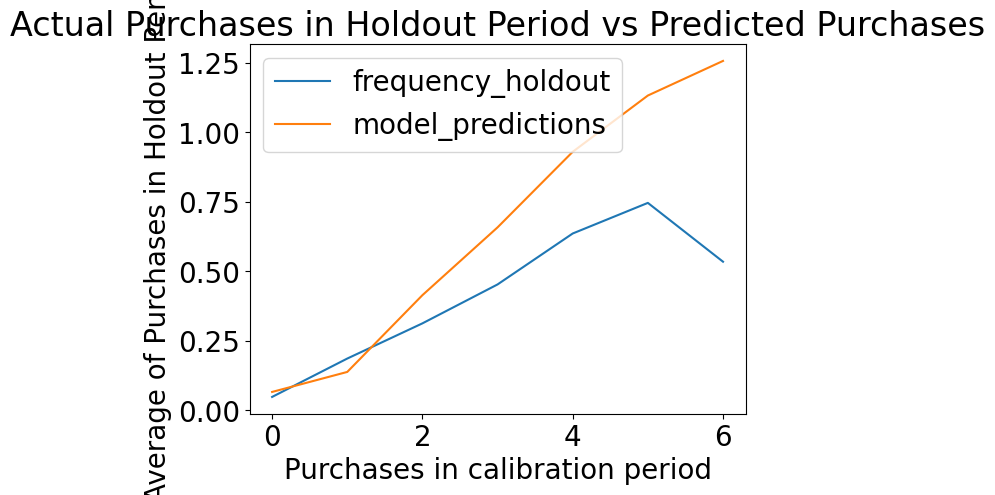

In [14]:
fig = plt.figure(figsize=(12, 12))
dfTeste = processarRFM(arquivoTransactions, 'customer_id', 'date', 'amount',split = 0.8)
plot_calibration_purchases_vs_holdout_purchases(criarModeloBGF(dfTeste),dfTeste,n = 7);


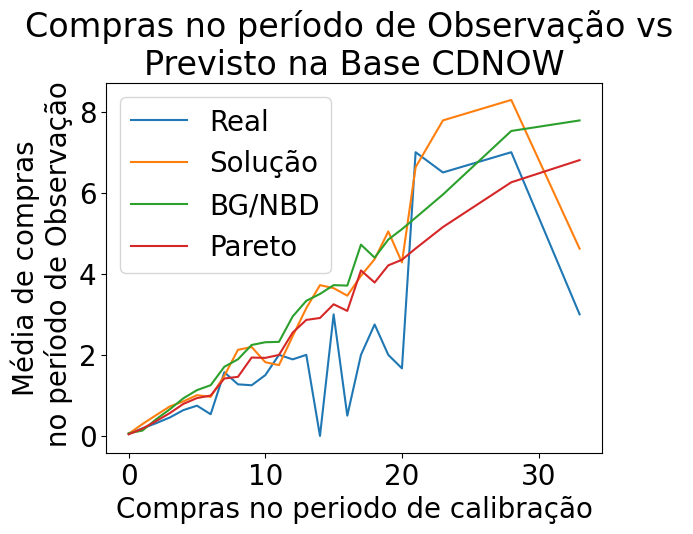

In [15]:
x_labels = {
        "frequency_cal": "Compras no periodo de calibração",
        "recency_cal": "Age of customer at last purchase",
        "T_cal": "Age of customer at the end of calibration period",
        "time_since_last_purchase": "Time since user made last purchase",
    }


ax = dadosML.groupby('frequency_cal')[["Real Expected","ExpectedML" ,"ExpectedBGF","ExpectedPareto"]].mean().plot()
#ax = summary.groupby(kind)[["Real Expected", "ExpectedML"]].mean().plot()
plt.title("Compras no período de Observação vs \nPrevisto na Base CDNOW")
plt.xlabel(x_labels['frequency_cal'])
plt.ylabel("Média de compras\n no período de Observação")
plt.legend(['Real', 'Solução', "BG/NBD","Pareto"], loc='upper left')
plt.show()

/tmp/ipykernel_53350/2162248958.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)


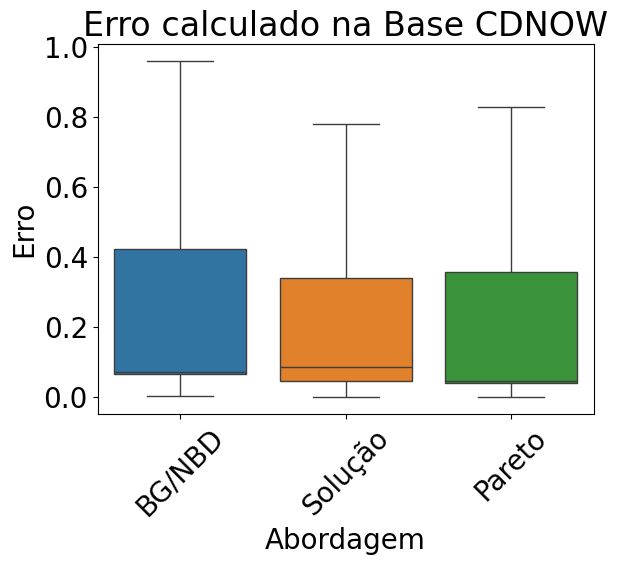

In [16]:
ax = sns.boxplot(data = dadosML[['ErroBG','ErroML','ErroPareto']],orient = "v",showfliers = False)
labels = ["BG/NBD","Solução","Pareto"]
plt.title("Erro calculado na Base CDNOW")
plt.ylabel("Erro")
plt.xlabel("Abordagem")
ax.set_xticklabels(labels, rotation=45)
plt.show()


## Calculando o valor monetário

In [17]:

from lifetimes import GammaGammaFitter

#Função para criar o modelo que prevê o valor monetário médio de cada cliente, usando o modelo Gamma Gamma.
#Retorna o dataset com a coluna 'ExpectedGammaGamma'
def preverValorGGF(rfm, #Dataset já processado pelo RFM
                   coefPenalizacao = 0.01, #Coeficiente de penalização utilizada pelo Gamma Gamma
                   teste = True #Caso seja para efetuar a predição em um dataset com ou sem o período de observação
                  ):
    monetary = "monetary_value"
    frequency = "frequency"
    if teste:
        monetary = "monetary_value_cal"
        frequency = "frequency_cal"
    ggf = GammaGammaFitter(coefPenalizacao)
    rfm = rfm[rfm[monetary] > 0]
    ggf.fit(rfm[frequency],rfm[monetary])
    print(ggf)
    rfm['ExpectedGammaGamma'] = ggf.conditional_expected_average_profit(rfm[frequency], rfm[monetary])
    return rfm

In [18]:
#Função feita para aplicar todos os passos para prever o valor monetário esperado de um cliente, utilizando tanto o Gamma-Gamma quanto modelos de aprendizado de máquina
#Retorna um dataset contendo as predições esperadas tanto pro Gamma-Gamma quanto para os modelos de aprendizado de máquina
def testarModelosPredicaoMonetario(splits = [i/20 for i in range(11,17)],# Quais divisões serão testadas, um vetor contendo os decimais
                                   file = arquivoTransactions, #Nome do arquivo onde os dados se encontram
                                   cID = "customer_id", #Nome da coluna de ID do cliente
                                   cDate = "date", #Nome da coluna de data
                                   cMonetary = 'amount' #Nome da coluna onde estão os valores monetários
                                  ):
    df2 = processarRFM(file, cID, cDate, cMonetary,split = splits[0])
    for i in splits[1:-1]:
        f = open(file,'r')
        df1 = processarRFM(file, cID, cDate, cMonetary,split = i)
        df2 = pd.concat([df2, df1], ignore_index=True)

    df2['target'] = ((df2['monetary_value_cal'] * df2['frequency_cal']) + (df2['monetary_value_holdout'] * df2['frequency_holdout'])) / (df2['frequency_cal'] + df2['frequency_holdout'])
    df2['target'] = df2['target'].fillna(0)
    f = open(file,'r')
    dfValidacao = processarRFM(file, cID, cDate, cMonetary,split = splits[-1])
    dfValidacao['target'] = ((dfValidacao['monetary_value_cal'] * dfValidacao['frequency_cal']) + (dfValidacao['monetary_value_holdout'] * dfValidacao['frequency_holdout'])) / (dfValidacao['frequency_cal'] + dfValidacao['frequency_holdout'])
    dfValidacao['target'] = dfValidacao['target'].fillna(0)

    
    modelML = escolheModelo(df2,target = 'target')
    dfValidacao['ExpectedML'] = modelML.predict(dfValidacao[['frequency_cal', 'recency_cal', 'T_cal', 'monetary_value_cal','duration_holdout', churnTeste]])
    dfValidacao['Real Expected'] = dfValidacao['target']
    dfValidacao[dfValidacao['ExpectedML'] < 0]= 0
    
    dfValidacao = preverValorGGF(dfValidacao)
    return dfValidacao
    
dadosML = testarModelosPredicaoMonetario()
dadosML

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.94 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.92 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.23 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.26 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.33 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.37 segundos

LassoCV  mse: 120.1387 

ElasticNet  mse: 120.1878 

RandomForestRegressor  mse: 104.4736 

GradientBoostingRegressor  mse: 106.8494 

HistGradientBoostingRegressor  mse: 142.8672 

XGBRegressor  mse: 101.9024 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000657 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 545
[LightGBM] [Info] Number of data points in the train set: 8838, number of used feat

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,target,ExpectedML,Real Expected,ExpectedGammaGamma
4,3.0,49.0,62.0,23.723333,0.0,0.00,16.0,0.958752,0.999939,0.999999,0.950820,23.723333,23.530052,23.723333,25.131917
21,1.0,2.0,62.0,11.770000,0.0,0.00,16.0,0.999471,1.000000,1.000000,0.983607,11.770000,10.079147,11.770000,15.833849
111,12.0,60.0,62.0,78.549167,2.0,64.23,16.0,0.815668,0.808563,0.882403,0.822581,76.503571,64.346992,76.503571,78.979448
112,1.0,5.0,62.0,11.770000,0.0,0.00,16.0,0.999416,1.000000,1.000000,0.982759,11.770000,9.717155,11.770000,15.833849
113,1.0,61.0,62.0,26.760000,0.0,0.00,16.0,0.666667,0.666667,0.731059,0.500000,26.760000,22.936613,26.760000,31.089488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23523,1.0,47.0,50.0,14.490000,0.0,0.00,16.0,0.962293,0.875000,0.914452,0.960784,14.490000,20.278252,14.490000,18.602050
23537,1.0,45.0,50.0,13.570000,1.0,25.98,16.0,0.964555,0.984375,0.995741,0.960784,19.775000,20.352734,19.775000,17.665747
23551,5.0,24.0,50.0,44.928000,0.0,0.00,16.0,0.921569,1.000000,1.000000,0.882353,44.928000,45.038757,44.928000,45.845285
23554,1.0,44.0,50.0,24.600000,0.0,0.00,16.0,0.964555,0.984375,0.995741,0.960784,24.600000,24.855124,24.600000,28.891211


In [19]:
print("Machine Learning ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedML']))
print("Gamma-Gamma ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedGammaGamma']))

Machine Learning  12.539123974157562
Gamma-Gamma  55.47042097145279


Average absolute error: 4.102986265670101


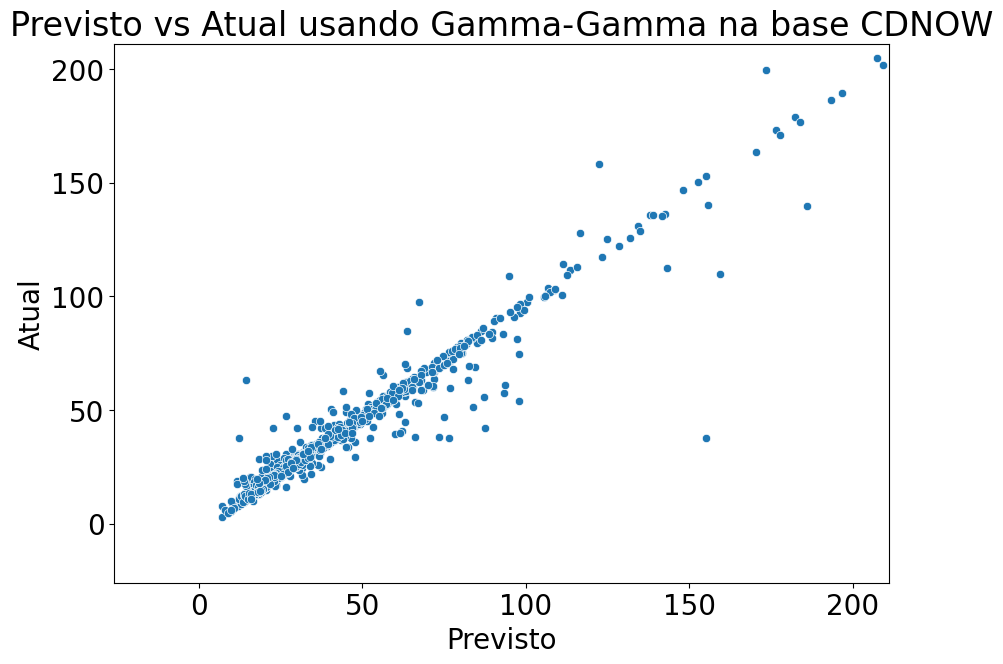

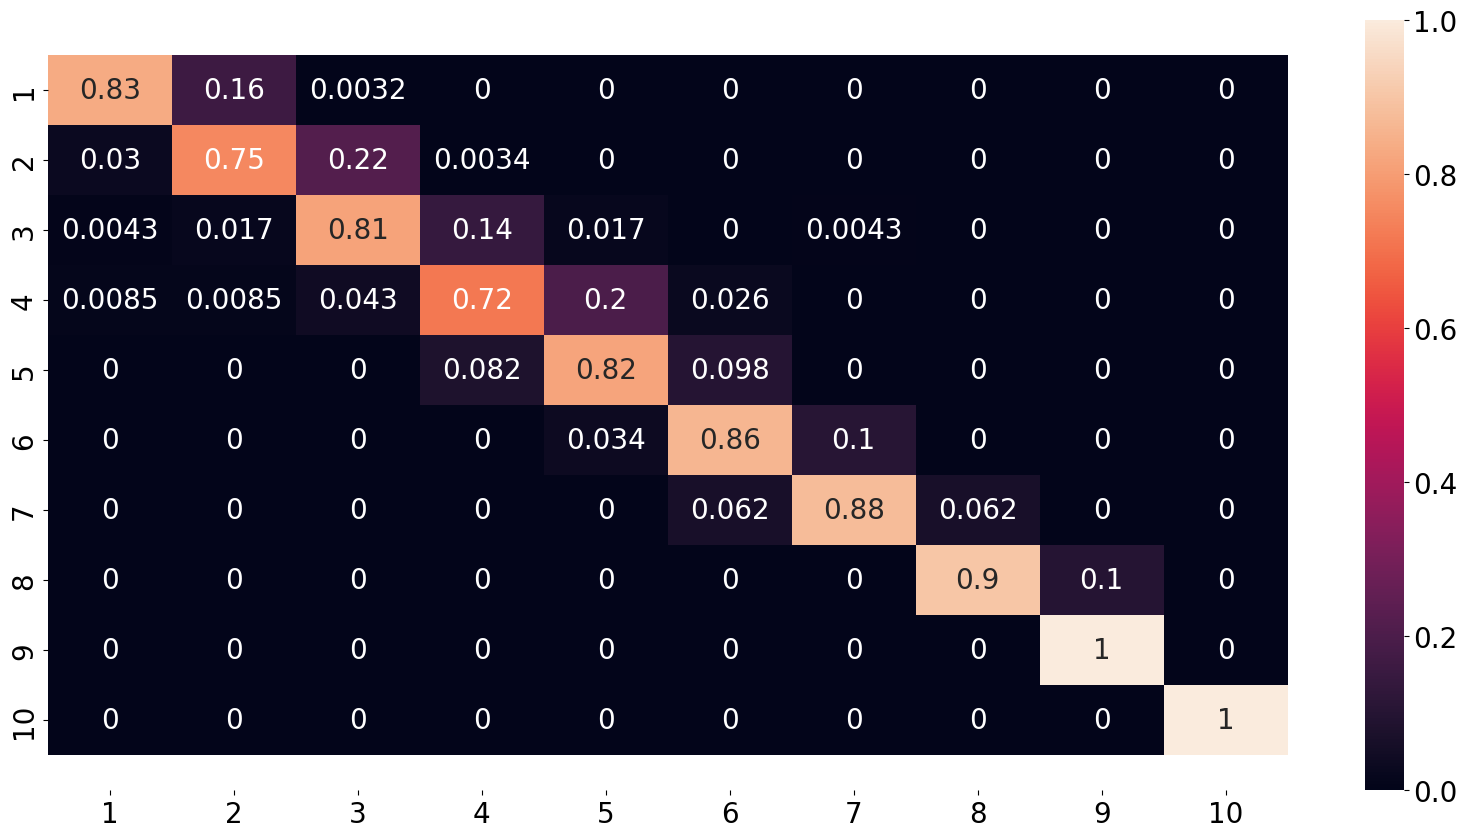

F1 score: 0.8247835772575233
Samples in each bin: 

0.0    313
1.0    296
2.0    231
3.0    117
4.0     61
5.0     29
6.0     16
7.0     10
8.0      4
9.0      1
Name: count, dtype: int64


In [20]:
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import confusion_matrix,f1_score

def evaluate_clv(actual, predicted, bins, title = ""):
    print(f"Average absolute error: {mean_absolute_error(actual, predicted)}")
    #Evaluate numeric
    ypbot = np.percentile(actual, 1)
    yptop = np.percentile(actual, 99)
    ypad = 0.2*(yptop - ypbot)
    ymin = ypbot - ypad
    ymax = yptop + ypad
    plt.figure(figsize=(10, 7))
    ax = sns.scatterplot(x=predicted, y=actual)
    plt.xlabel('Previsto')
    plt.ylabel('Atual')
    plt.title('Previsto vs Atual '+title)
    ax.set_xlim([ymin, ymax])
    ax.set_ylim([ymin, ymax])
    plt.show()
    
    #Evaluate Bins
    est = KBinsDiscretizer(n_bins=bins, encode='ordinal', strategy='kmeans')
    est.fit(np.array(actual).reshape(-1, 1))
    actual_bin = est.transform(np.array(actual).reshape(-1, 1)).ravel()
    predicted_bin = est.transform(np.array(predicted).reshape(-1, 1)).ravel()
    
    cm = confusion_matrix(actual_bin, predicted_bin, normalize='true')
    df_cm = pd.DataFrame(cm, index = range(1, bins+1),
                      columns = range(1, bins+1))
    plt.figure(figsize = (20,10))
    sns.heatmap(df_cm, annot=True)

    # fix for mpl bug that cuts off top/bottom of seaborn viz
    b, t = plt.ylim() # discover the values for bottom and top
    b += 0.5 # Add 0.5 to the bottom
    t -= 0.5 # Subtract 0.5 from the top
    plt.ylim(b, t) # update the ylim(bottom, top) values
    plt.show()
    print(f'F1 score: {f1_score(actual_bin, predicted_bin, average="macro")}')
    print('Samples in each bin: \n')
    print(pd.Series(actual_bin).value_counts())

evaluate_clv(dadosML['Real Expected'], dadosML['ExpectedGammaGamma'], bins=10,title="usando Gamma-Gamma na base CDNOW")

Average absolute error: 1.9612365935161238


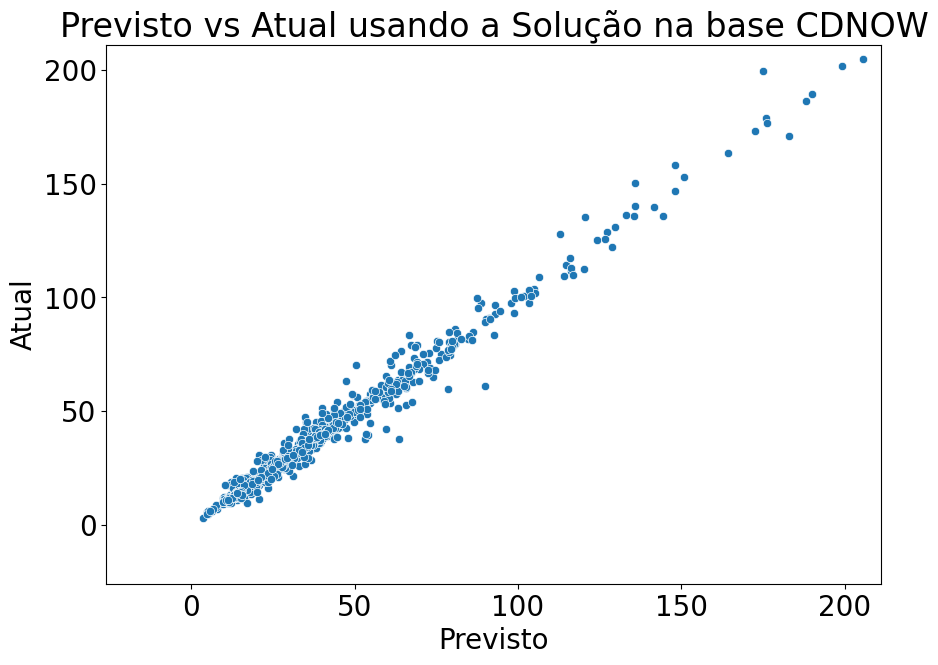

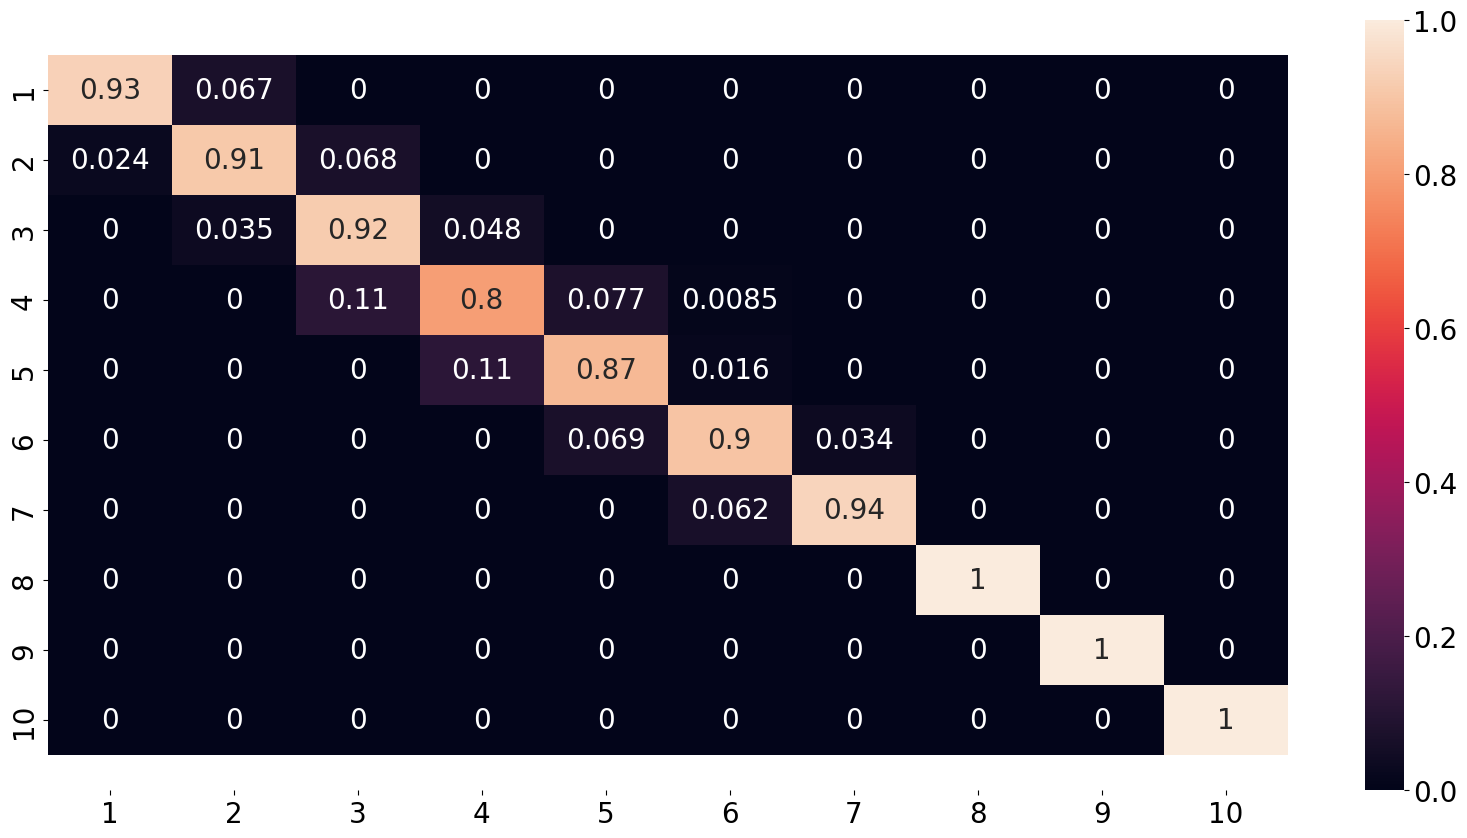

F1 score: 0.9253740997085874
Samples in each bin: 

0.0    313
1.0    296
2.0    231
3.0    117
4.0     61
5.0     29
6.0     16
7.0     10
8.0      4
9.0      1
Name: count, dtype: int64


In [21]:
evaluate_clv(dadosML['Real Expected'], dadosML['ExpectedML'], bins=10,title="usando a Solução na base CDNOW")

## Calculo do lifetime Value

In [22]:
from lifetimes.utils import _customer_lifetime_value

In [23]:
dfValidacao = processarRFM(arquivoTransactions, 'customer_id', 'date', 'amount',teste= False)
modelBGF = criarModeloBGF(dfValidacao,teste=False)
dfValidacao['ExpectedBGF'] = comprasEsperadas(modelBGF, dfValidacao,numPeriodos = 6,teste = False)


dfValidacao.head(3)

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.71 segundos



,frequency,recency,T,monetary_value,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedBGF
4,3.0,49.0,78.0,23.723333,0.973342,1.0,1.0,0.960526,0.192552
18,0.0,0.0,78.0,0.000000,1.000000,1.0,1.0,1.000000,0.018341
21,1.0,2.0,78.0,11.770000,0.999658,1.0,1.0,0.986842,0.011905


### Solução do lifetimes

In [24]:
DISCOUNT_a = 0.06                # annual discount rate
LIFE = 12                        # lifetime expected for the customers in months

#LTV de acordo com a função do lifetimes
dfValidacao['LTV'] = _customer_lifetime_value(
        transaction_prediction_model = modelBGF,  
        frequency = dfValidacao["frequency"],  
        recency = dfValidacao["recency"],  
        T = dfValidacao["T"],  
        monetary_value = dfValidacao["monetary_value"],  
        time = 12,    
        freq = "D",                          
        discount_rate = DISCOUNT_a)
dfValidacao.head(3)

/home/sabrinabruni/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,frequency,recency,T,monetary_value,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedBGF,LTV
4,3.0,49.0,78.0,23.723333,0.973342,1.0,1.0,0.960526,0.192552,169.926512
18,0.0,0.0,78.0,0.000000,1.000000,1.0,1.0,1.000000,0.018341,NaN
21,1.0,2.0,78.0,11.770000,0.999658,1.0,1.0,0.986842,0.011905,5.098051


In [25]:
dfValidacao = preverValorGGF(dfValidacao,teste = False)
dfValidacao['LTVGammaGamma'] = _customer_lifetime_value(
        transaction_prediction_model = modelBGF,  
        frequency = dfValidacao["frequency"],  
        recency = dfValidacao["recency"],  
        T = dfValidacao["T"],  
        monetary_value = dfValidacao["ExpectedGammaGamma"],  
        time = 12,    
        freq = "D",                          
        discount_rate = DISCOUNT_a)
dfValidacao.head(3)

<lifetimes.GammaGammaFitter: fitted with 1126 subjects, p: 4.10, q: 0.94, v: 3.83>


,frequency,recency,T,monetary_value,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedBGF,LTV,ExpectedGammaGamma,LTVGammaGamma
4,3.0,49.0,78.0,23.723333,0.973342,1.000000,1.000000,0.960526,0.192552,169.926512,25.123278,179.954094
21,1.0,2.0,78.0,11.770000,0.999658,1.000000,1.000000,0.986842,0.011905,5.098051,15.831974,6.857452
111,14.0,76.0,78.0,76.503571,0.831169,0.742182,0.765889,0.831169,0.993883,2861.425866,76.858389,2874.696953


### Solução elaborada

In [26]:
#Função feita para adaptar o cálculo do LTV tanto para o contexto de aprendizado de máquina quanto para modelos probabilísticos
#Retorna um dataframe contendo as colunas do LTV esperado
def calculaLTV(df # Dataframe que já tenha sido processado pelo RFM
               ,modelo # Modelo utilizado para prever as compras esperadas
               ,monetaryCol #Nome da coluna onde possui o valor médio esperado por transação
               , DISCOUNT_a = 0.06 #Taxa de desconto anual
               ,LIFE = 12 #Meses que deseja calcular o lifetime
               ,freq = "D" #Frequência que os dados estão
               ,teste = True #Caso seja para prever de acordo com o período de observação ou não
               , ML = False #Caso o modelo passado seja de aprendizado de máquina, necessista ser true
              ):
    #DISCOUNT_a annual discount rate
    #LIFE lifetime expected for the customers in months
    #Freq: Date unit of the frequency
    dfRetorno = df.copy()
    if teste == True:
        dfRetorno = dfRetorno.rename(columns = {'frequency_cal':'frequency', 'recency_cal':'recency', 'T_cal':'T', "monetary_value_cal" : 'monetary_value'})
    dfRetorno['LTV'] = 0 
    factor = {"W": 4.345, "M": 1.0, "D": 30, "H": 30 * 24}[freq] 
    for i in np.arange(1, LIFE + 1) * factor:
        # since the prediction of number of transactions is cumulative, we have to subtract off the previous periods
        if ML:
            dfRetorno['X1'] = i
            dfRetorno['X2'] = i - factor
            expectedPurchase = modelo.predict(dfRetorno[['frequency', 'recency', 'T', 'monetary_value','X1', churnTeste]].values
                                             ) - modelo.predict(dfRetorno[['frequency', 'recency', 'T', 'monetary_value','X2', churnTeste]].values)
            dfRetorno['Expected'+str(i)] = expectedPurchase

        else:
            expectedPurchase = comprasEsperadas(modelo, df,i,teste = teste) - comprasEsperadas(modelo, df,i - factor,teste = teste)
            dfRetorno['Expected'+str(i)] = expectedPurchase
        # sum up the CLV estimates of all of the periods and apply discounted cash flow
        dfRetorno['LTV'] = dfRetorno['LTV'] + ((df[monetaryCol] * expectedPurchase) / (1 + DISCOUNT_a) ** (i / factor))
    return dfRetorno

#dfValidacao['ltv'] = calculaLTV(dfValidacao,modelBGF,'monetary_value',teste = False,LIFE = 12)
#dfValidacao
calculaLTV(dfValidacao,modelBGF,'monetary_value',teste = False,LIFE = 2)

,frequency,recency,T,monetary_value,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedBGF,LTV,ExpectedGammaGamma,LTVGammaGamma,Expected30,Expected60
4,3.0,49.0,78.0,23.723333,0.973342,1.000000,1.000000,0.960526,0.192552,40.451958,25.123278,179.954094,0.946274,0.912861
21,1.0,2.0,78.0,11.770000,0.999658,1.000000,1.000000,0.986842,0.011905,1.230619,15.831974,6.857452,0.058251,0.055733
111,14.0,76.0,78.0,76.503571,0.831169,0.742182,0.765889,0.831169,0.993883,676.323779,76.858389,2874.696953,4.895809,4.743539
112,1.0,5.0,78.0,11.770000,0.999630,1.000000,1.000000,0.986301,0.016303,1.685220,15.831974,9.390653,0.079769,0.076321
113,1.0,61.0,78.0,26.760000,0.993464,0.999992,1.000000,0.941176,0.059770,14.047156,31.047737,67.516952,0.292453,0.279813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23523,1.0,47.0,66.0,14.490000,0.977386,0.999996,1.000000,0.969697,0.067262,8.514950,18.592939,44.990480,0.328141,0.312446
23537,2.0,53.0,66.0,19.775000,0.954319,0.999877,0.999996,0.954545,0.163288,28.394394,21.850638,130.503865,0.799384,0.766000
23551,5.0,24.0,66.0,44.928000,0.952962,1.000000,1.000000,0.909091,0.124459,49.419160,45.829412,211.284516,0.610953,0.588309
23554,1.0,44.0,66.0,24.600000,0.978743,1.000000,1.000000,0.969697,0.065539,14.085860,28.855206,68.034828,0.319739,0.304445


In [27]:
#Função para criar os modelos de aprendizado de máquina separados dos testes                                

def prepararML(splits = [i/20 for i in range(11,17)], # Quais divisões serão testadas, um vetor contendo os decimais
               file = arquivoTransactions, #Nome do arquivo onde os dados se encontram
               cID = "customer_id", #Nome da coluna de ID do cliente
               cDate = "date", #Nome da coluna de data
               cMonetary = 'amount'): #Nome da coluna onde estão os valores monetários

    f = pd.read_csv(file)
    
    df2 = processarRFM(file, cID, cDate, cMonetary,split = splits[0])
    for i in splits[1:-1]:
        df1 = processarRFM(file, cID, cDate, cMonetary,split = i)
        df2 = pd.concat([df2, df1])
        df2 = df2.fillna(0.0)

    dfValidacao = processarRFM(file, cID, cDate, cMonetary,split = splits[-1])
    modelML = escolheModelo(df2,target = 'frequency_holdout')
    return modelML

Modelo = prepararML(splits = [i/20 for i in range(1,17)])
Modelo

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.42 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.57 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.69 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.71 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.05 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.75 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.76 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.82 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.85 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.79 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 3.91 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorr

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

/tmp/ipykernel_53350/1152760770.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


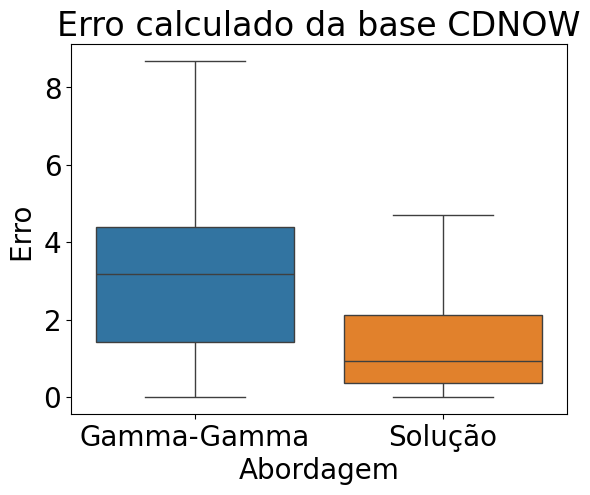

In [28]:
dadosML['Erro Gamma Gamma'] = abs(dadosML['Real Expected'] - dadosML['ExpectedGammaGamma'])
dadosML['Erro Machine Learning'] = abs(dadosML['Real Expected'] - dadosML['ExpectedML'])

ax = sns.boxplot(data = dadosML[['Erro Gamma Gamma', 'Erro Machine Learning']],orient = "v",showfliers = False)
labels = ["Gamma-Gamma","Solução"]
plt.title("Erro calculado da base CDNOW")
plt.ylabel("Erro ")
plt.xlabel("Abordagem")
ax.set_xticklabels(labels)
plt.show()


In [29]:

dfValidacao = processarRFM(arquivoTransactions, 'customer_id', 'date', 'amount',teste= True)
modelBGF = criarModeloBGF(dfValidacao,teste=True)
dfValidacao['ExpectedBGF'] = comprasEsperadas(modelBGF, dfValidacao,numPeriodos = 1,teste = True)

modeloPareto = criarModeloPareto(dfValidacao,teste=True)

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 4.51 segundos



/tmp/ipykernel_53350/4094428940.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)


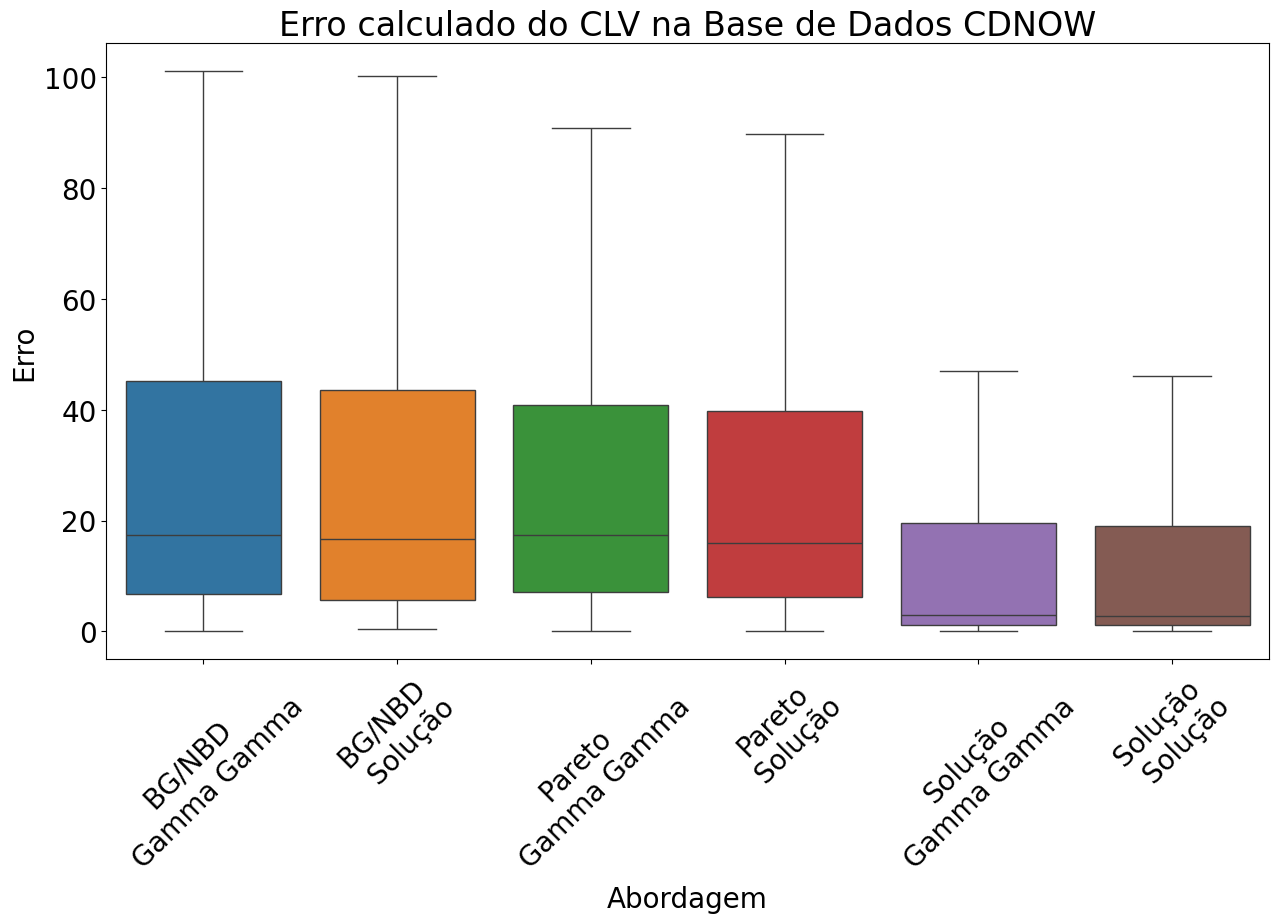

In [30]:
dadosML['LTV BG GG'] = calculaLTV(dadosML,modelBGF,'ExpectedGammaGamma',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV BG ML'] = calculaLTV(dadosML,modelBGF,'ExpectedML',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV Pareto GG'] = calculaLTV(dadosML,modeloPareto,'ExpectedGammaGamma',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV Pareto ML'] = calculaLTV(dadosML,modeloPareto,'ExpectedML',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV ML GG'] = calculaLTV(dadosML,Modelo,'ExpectedGammaGamma',teste = True,ML = True,LIFE = 1)['LTV']
dadosML['LTV ML ML'] = calculaLTV(dadosML,Modelo,'ExpectedML',teste = True,ML = True,LIFE = 1)['LTV']
dadosML['LTV Real'] = (dadosML['frequency_holdout'] * dadosML['target']) / 1.06
dadosML[dadosML < 0] = 0


dadosML['ErroLTV BG GG'] = abs(dadosML['LTV Real'] - dadosML['LTV BG GG'])
dadosML['ErroLTV ML GG'] = abs(dadosML['LTV Real'] - dadosML['LTV ML GG'])
dadosML['ErroLTV Pareto GG'] = abs(dadosML['LTV Real'] - dadosML['LTV Pareto GG'])
dadosML['ErroLTV Pareto ML'] = abs(dadosML['LTV Real'] - dadosML['LTV Pareto ML'])
dadosML['ErroLTV BG ML'] = abs(dadosML['LTV Real'] - dadosML['LTV BG ML'])
dadosML['ErroLTV ML ML'] = abs(dadosML['LTV Real'] - dadosML['LTV ML ML'])

labels = ['BG/NBD \n Gamma Gamma','BG/NBD \n Solução','Pareto \n Gamma Gamma','Pareto\n Solução','Solução\nGamma Gamma','Solução \n Solução']
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,8))
ax = sns.boxplot(data = dadosML[['ErroLTV BG GG', 'ErroLTV BG ML','ErroLTV Pareto GG' ,'ErroLTV Pareto ML','ErroLTV ML GG', 'ErroLTV ML ML']],orient = "v",showfliers = False)
plt.title("Erro calculado do CLV na Base de Dados CDNOW")
plt.ylabel("Erro")
ax.set_xticklabels(labels, rotation=45)
plt.xlabel("Abordagem")
plt.show()



In [31]:
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV BG GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV ML GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV Pareto GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV Pareto ML']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV BG ML']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV ML ML']))

38.14593727570304
19.785801608914934
33.8559248392998
32.104736178902236
36.11000537816845
19.68688305874524


In [32]:
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV BG GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV ML GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV Pareto GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV Pareto ML']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV BG ML']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV ML ML']))

5025.702294672069
2189.705470215358
3572.0743676099755
3198.5375619903125
4458.642762472248
2204.3615274485746


# Dataset: Olist

In [33]:
rfm = processarRFM(arquivoOlist,'customer_unique_id','order_purchase_timestamp','TotalPrice')
rfm

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 138.19 segundos



,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente
0000f46a3911fa3c0805444483337064,0.0,0.0,57.0,0.0,0.0,0.0,20.0,0.999416,1.000000,1.000000,0.982759
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,26.0,0.0,0.0,0.0,20.0,0.997354,1.000000,1.000000,0.962963
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,21.0,0.0,0.0,0.0,20.0,0.996047,1.000000,1.000000,0.954545
0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.666667,0.666667,0.731059,0.500000
00053a61a98854899e70ed204dd4bafe,0.0,0.0,6.0,0.0,0.0,0.0,20.0,0.964286,0.992126,0.998432,0.857143
...,...,...,...,...,...,...,...,...,...,...,...
a3adfb1ef257529c6abe81be7726a63f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000
58a3b88ec0ed98474b1bb2630b277ed4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000
b0854ff72fac3b922fde0115dd2c0a5f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000
4a7ce65ce092885c0af12dc0001457cf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [34]:
dadosML = testarModelosPredicaoFrequencia(file = arquivoOlist, cID = "customer_unique_id",cDate = "order_purchase_timestamp",cMonetary = 'TotalPrice')
dadosML

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 136.09 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 120.65 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 129.96 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 126.99 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 132.64 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 136.05 segundos

Criando modelo BG/NBD
Tempo BG/NBD:  0:00:08.277838
<lifetimes.BetaGeoFitter: fitted with 477100 subjects, a: 0.00, alpha: 4.10, b: 0.00, r: 0.01>
Criando modelo Pareto
<lifetimes.ParetoNBDFitter: fitted with 477100 subjects, alpha: 182.51, beta: 6.18, r: 0.27, s: 0.56>
Tempo Pareto:  0:05:40.223458
Criando modelo ML
LassoCV  mse: 0.0088 

ElasticNet  mse: 0.0090 

RandomForestRegressor  mse: 0.0086 

GradientBoostingRegressor  mse: 0.0087 

HistGradientBoostingRegressor  m

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedML,Real Expected,ExpectedBGF,ExpectedPareto
0000f46a3911fa3c0805444483337064,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,26.0,0.0,0.0,0.0,20.0,0.997354,1.000000,1.000000,0.962963,0.001869,0.0,0.005430,0.008965
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,21.0,0.0,0.0,0.0,20.0,0.996047,1.000000,1.000000,0.954545,0.006955,0.0,0.006288,0.009917
0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.666667,0.666667,0.731059,0.500000,0.006386,0.0,0.019416,0.017905
00053a61a98854899e70ed204dd4bafe,0.0,0.0,6.0,0.0,0.0,0.0,20.0,0.964286,0.992126,0.998432,0.857143,0.002708,0.0,0.012367,0.014724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
a3adfb1ef257529c6abe81be7726a63f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
58a3b88ec0ed98474b1bb2630b277ed4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
b0854ff72fac3b922fde0115dd2c0a5f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
4a7ce65ce092885c0af12dc0001457cf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


In [35]:
print("Machine Learning ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedML']))
print("BGF ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedBGF']))
print("Pareto ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedPareto']))

Machine Learning  0.005371992896338156
BGF  0.006054230359122621
Pareto  0.005766122210204106


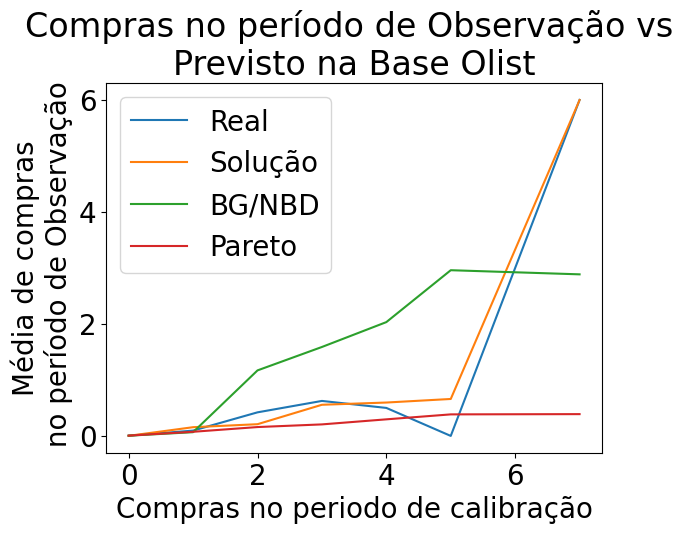

In [36]:
x_labels = {
        "frequency_cal": "Compras no periodo de calibração",
        "recency_cal": "Age of customer at last purchase",
        "T_cal": "Age of customer at the end of calibration period",
        "time_since_last_purchase": "Time since user made last purchase",
    }


ax = dadosML.groupby('frequency_cal')[["Real Expected","ExpectedML" ,"ExpectedBGF","ExpectedPareto"]].mean().plot()
#ax = summary.groupby(kind)[["Real Expected", "ExpectedML"]].mean().plot()
plt.title("Compras no período de Observação vs \nPrevisto na Base Olist")
plt.xlabel(x_labels['frequency_cal'])
plt.ylabel("Média de compras\n no período de Observação")
plt.legend(['Real', 'Solução', "BG/NBD","Pareto"], loc='upper left')
plt.show()

/tmp/ipykernel_53350/1341728727.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)


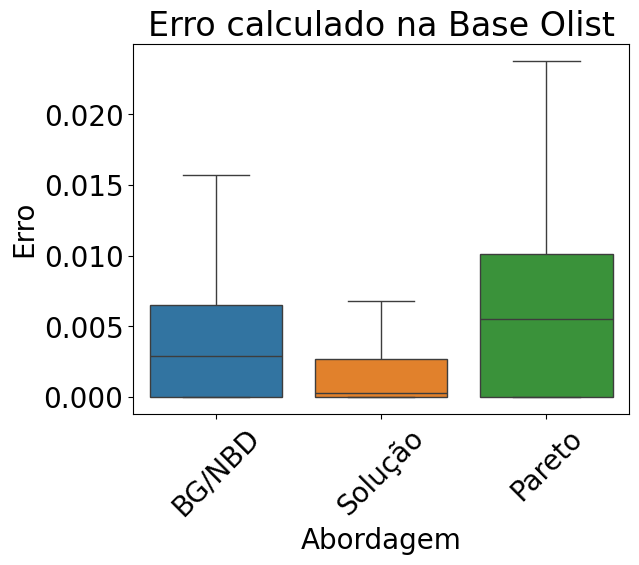

In [37]:
dadosML['ErroML'] = abs(dadosML['Real Expected'] - dadosML['ExpectedML'])
dadosML['ErroBG'] = abs(dadosML['Real Expected'] - dadosML['ExpectedBGF'])
dadosML['ErroPareto'] = abs(dadosML['Real Expected'] - dadosML['ExpectedPareto'])

ax = sns.boxplot(data = dadosML[['ErroBG','ErroML','ErroPareto']],orient = "v",showfliers = False)
labels = ["BG/NBD","Solução","Pareto"]
plt.title("Erro calculado na Base Olist")
plt.ylabel("Erro")
plt.xlabel("Abordagem")
ax.set_xticklabels(labels, rotation=45)
plt.show()


In [38]:
dadosML = testarModelosPredicaoMonetario(file = arquivoOlist,cID = "customer_unique_id",cDate = "order_purchase_timestamp",cMonetary = 'TotalPrice')
dadosML

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 156.82 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 159.61 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 162.93 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 166.39 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 168.64 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 167.85 segundos

LassoCV  mse: 231.1062 

ElasticNet  mse: 231.1354 

RandomForestRegressor  mse: 234.9872 

GradientBoostingRegressor  mse: 230.7396 

HistGradientBoostingRegressor  mse: 500.2768 

XGBRegressor  mse: 236.6337 

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019267 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] Number of data points in the train set: 357825, numbe

/home/sabrinabruni/.local/lib/python3.8/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but GradientBoostingRegressor was fitted without feature names
  warnings.warn(


,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,target,ExpectedML,Real Expected,ExpectedGammaGamma
004288347e5e88a27ded2bb23747066c,1.0,24.0,37.0,87.900,0.0,0.00,20.0,0.963563,0.999878,0.999996,0.947368,87.900,90.568899,87.900,104.574419
011b4adcd54683b480c4d841250a987f,1.0,25.0,33.0,170.910,0.0,0.00,20.0,0.954622,0.998047,0.999788,0.941176,170.910,177.990603,170.910,199.413689
013f4353d26bb05dc6652f1269458d8d,1.0,1.0,20.0,192.000,0.0,0.00,20.0,0.987013,0.999999,1.000000,0.904762,192.000,190.244565,192.000,223.509102
015557c9912277312b9073947804a7ba,1.0,6.0,55.0,59.900,0.0,0.00,20.0,0.994987,1.000000,1.000000,0.964286,59.900,66.759207,59.900,72.584303
01886ef98f995e4f2dd75a1d04c97397,1.0,14.0,19.0,16.000,0.0,0.00,20.0,0.923810,0.984374,0.995741,0.900000,16.000,16.775944,16.000,22.428371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
fe59d5878cd80080edbd29b5a0a4e1cf,2.0,11.0,44.0,24.490,0.0,0.00,20.0,0.976812,1.000000,1.000000,0.933333,24.490,26.745768,24.490,28.055095
fe81bb32c243a86b2f86fbf053fe6140,2.0,18.0,25.0,63.550,2.0,676.15,20.0,0.935385,0.996094,0.999424,0.880000,369.850,66.740238,369.850,69.713089
fed519569d16e690df6f89cb99d4e682,1.0,12.0,16.0,89.900,0.0,0.00,20.0,0.901961,0.937492,0.968528,0.882353,89.900,90.596189,89.900,106.859428
ff8892f7c26aa0446da53d01b18df463,1.0,26.0,46.0,49.950,0.0,0.00,20.0,0.974291,0.999999,1.000000,0.957447,49.950,54.978711,49.950,61.216387


In [39]:
print("Machine Learning ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedML']))
print("Gamma-Gamma ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedGammaGamma']))

Machine Learning  4582.521235971278
Gamma-Gamma  3019.481295145275


Average absolute error: 26.89152934326426


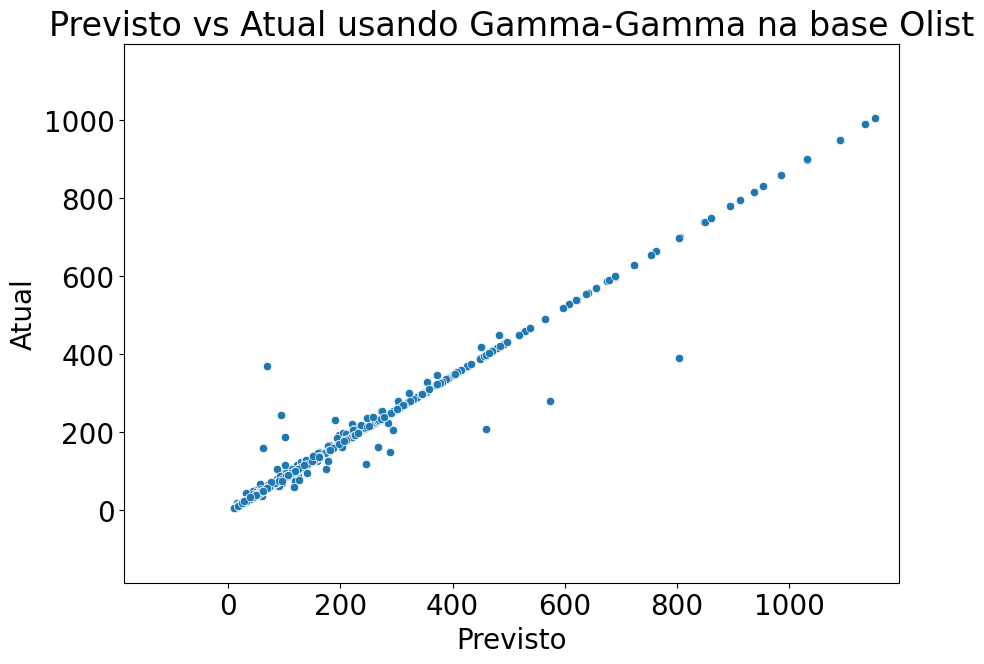

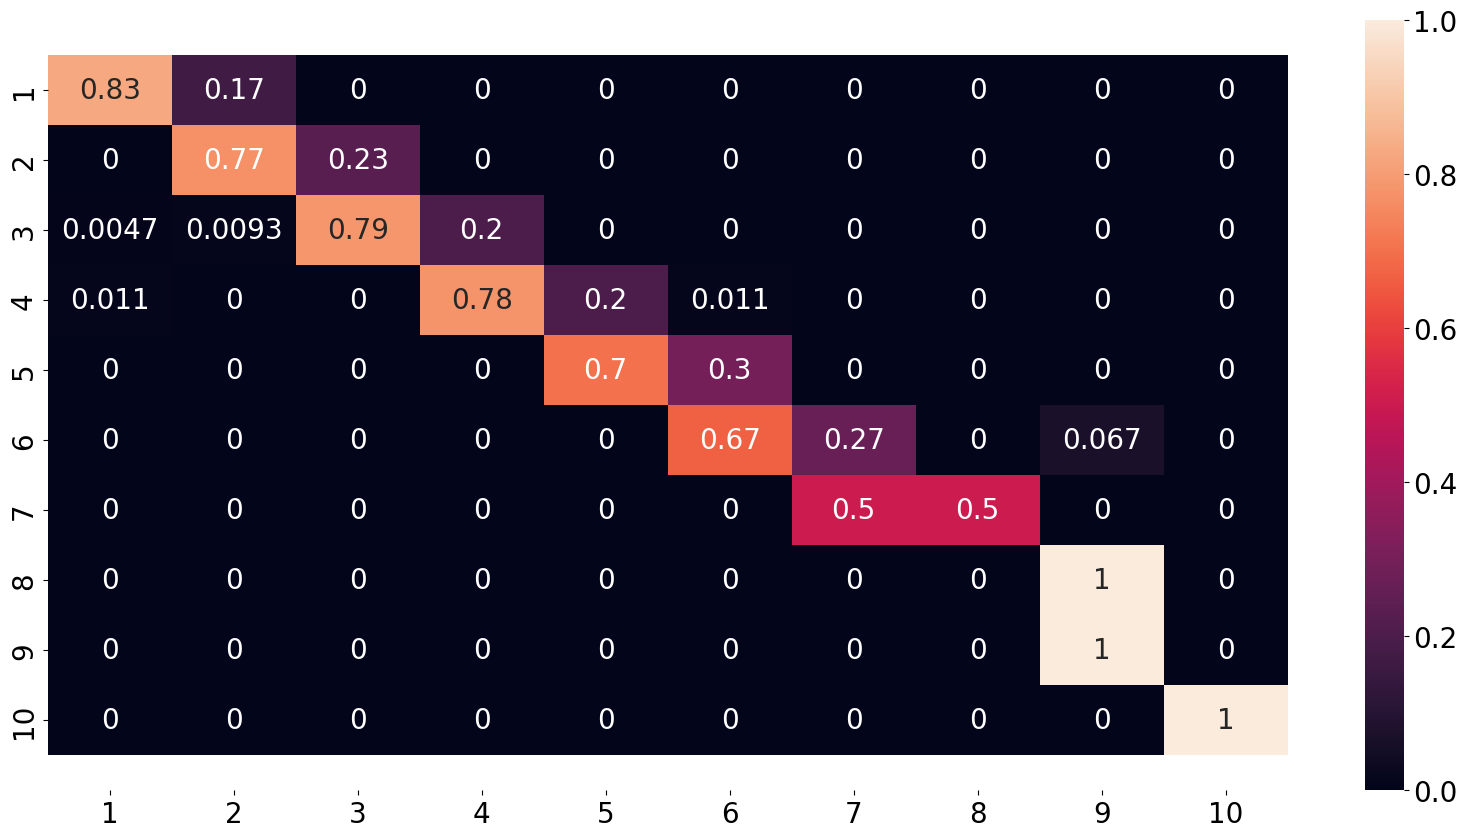

F1 score: 0.610231464954464
Samples in each bin: 

0.0    464
1.0    326
2.0    214
3.0     95
4.0     20
5.0     15
7.0      4
6.0      4
8.0      2
9.0      1
Name: count, dtype: int64


In [40]:
evaluate_clv(dadosML['Real Expected'], dadosML['ExpectedGammaGamma'], bins=10, title="usando Gamma-Gamma na base Olist")

Average absolute error: 7.9335623339078


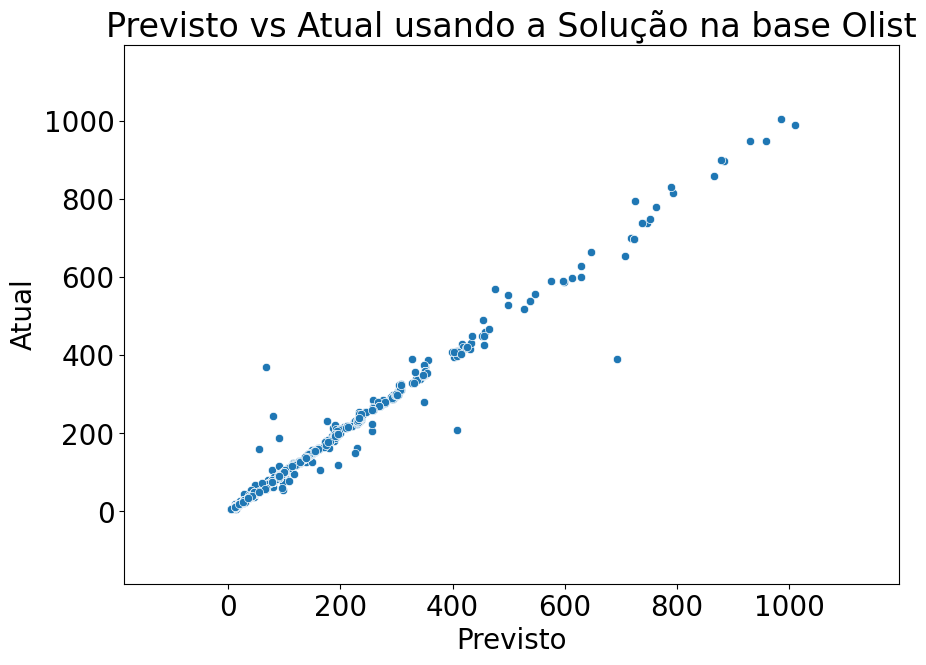

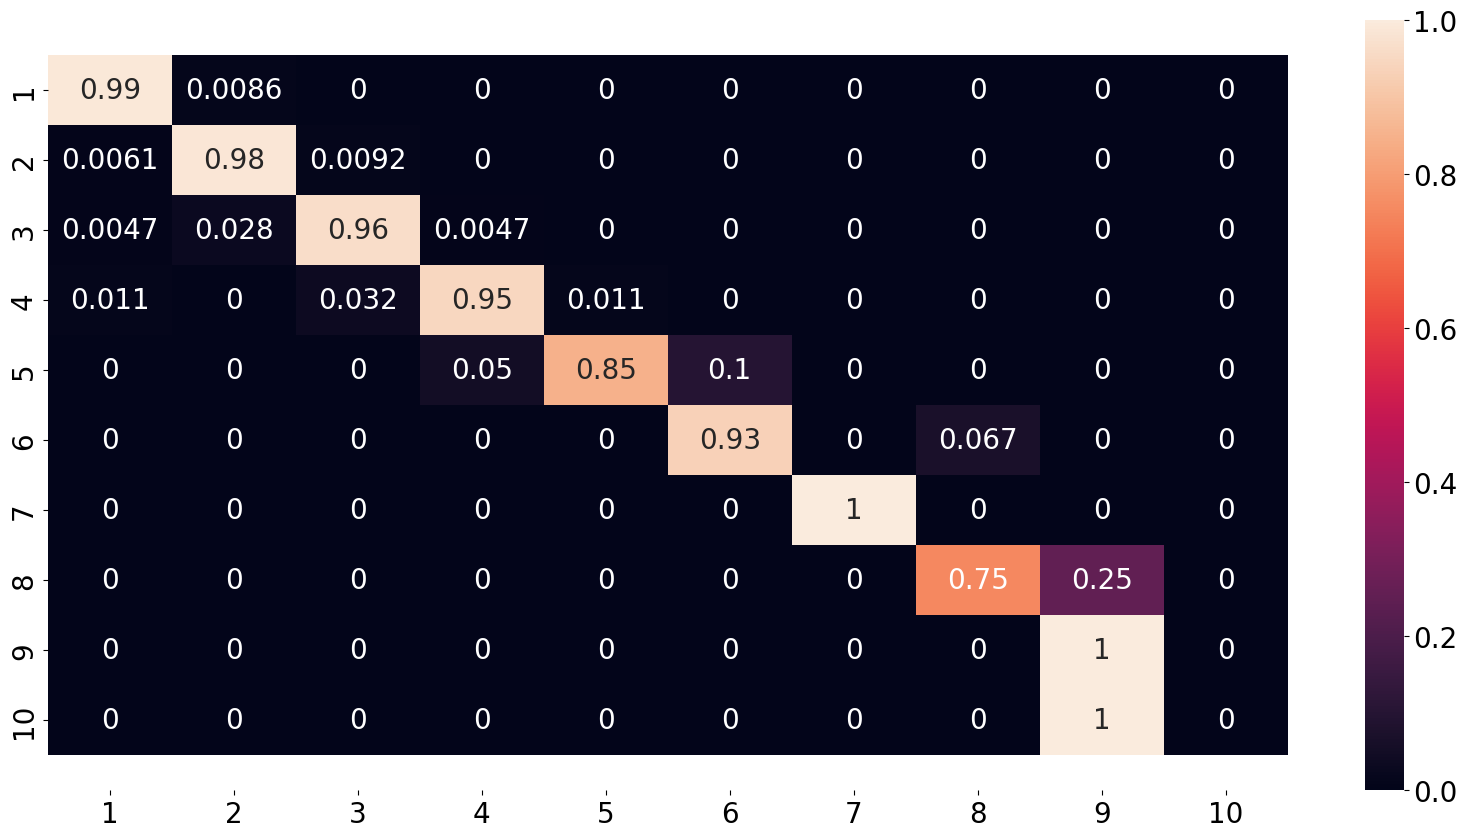

F1 score: 0.8112880570494587
Samples in each bin: 

0.0    464
1.0    326
2.0    214
3.0     95
4.0     20
5.0     15
7.0      4
6.0      4
8.0      2
9.0      1
Name: count, dtype: int64


In [41]:
evaluate_clv(dadosML['Real Expected'], dadosML['ExpectedML'], bins=10, title="usando a Solução na base Olist")

/tmp/ipykernel_53350/1214371583.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels)


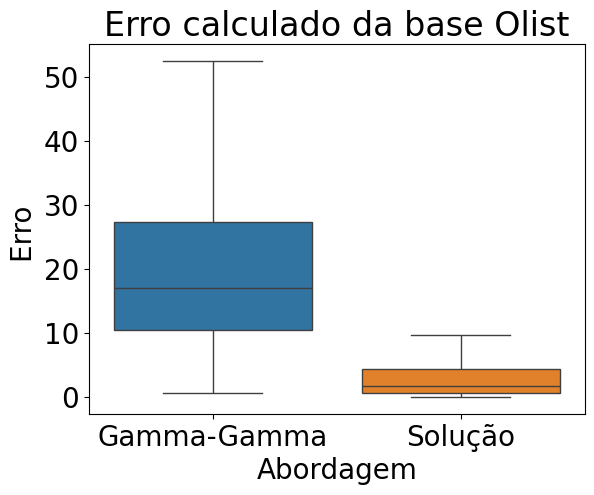

In [42]:
dadosML['Erro Gamma Gamma'] = abs(dadosML['Real Expected'] - dadosML['ExpectedGammaGamma'])
dadosML['Erro Machine Learning'] = abs(dadosML['Real Expected'] - dadosML['ExpectedML'])

ax = sns.boxplot(data = dadosML[['Erro Gamma Gamma', 'Erro Machine Learning']],orient = "v",showfliers = False)
labels = ["Gamma-Gamma","Solução"]
plt.title("Erro calculado da base Olist")
plt.ylabel("Erro ")
plt.xlabel("Abordagem")
ax.set_xticklabels(labels)
plt.show()


In [43]:
dfValidacao = processarRFM(arquivoOlist,'customer_unique_id','order_purchase_timestamp','TotalPrice')
modelBGF = criarModeloBGF(dfValidacao,teste=True)
dfValidacao['ExpectedBGF'] = comprasEsperadas(modelBGF, dfValidacao,numPeriodos = 1,teste = True)
dfValidacao


Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 126.66 segundos



,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedBGF
0000f46a3911fa3c0805444483337064,0.0,0.0,57.0,0.0,0.0,0.0,20.0,0.999416,1.000000,1.000000,0.982759,0.000186
0000f6ccb0745a6a4b88665a16c9f078,0.0,0.0,26.0,0.0,0.0,0.0,20.0,0.997354,1.000000,1.000000,0.962963,0.000366
0004aac84e0df4da2b147fca70cf8255,0.0,0.0,21.0,0.0,0.0,0.0,20.0,0.996047,1.000000,1.000000,0.954545,0.000434
0004bd2a26a76fe21f786e4fbd80607f,0.0,0.0,1.0,0.0,0.0,0.0,20.0,0.666667,0.666667,0.731059,0.500000,0.001678
00053a61a98854899e70ed204dd4bafe,0.0,0.0,6.0,0.0,0.0,0.0,20.0,0.964286,0.992126,0.998432,0.857143,0.000977
...,...,...,...,...,...,...,...,...,...,...,...,...
a3adfb1ef257529c6abe81be7726a63f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.001959
58a3b88ec0ed98474b1bb2630b277ed4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.001959
b0854ff72fac3b922fde0115dd2c0a5f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.001959
4a7ce65ce092885c0af12dc0001457cf,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.001959


In [44]:
Modelo = prepararML(file = arquivoOlist, cID = "customer_unique_id",cDate = "order_purchase_timestamp",cMonetary = 'TotalPrice')
modelBGF = criarModeloBGF(dfValidacao,teste=True)
modeloPareto = criarModeloPareto(dfValidacao,teste=True)

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 116.17 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 117.91 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 120.28 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 123.84 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 124.52 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 128.43 segundos

LassoCV  mse: 0.0088 

ElasticNet  mse: 0.0090 

RandomForestRegressor  mse: 0.0086 

GradientBoostingRegressor  mse: 0.0087 

HistGradientBoostingRegressor  mse: 0.0088 

XGBRegressor  mse: 0.0085 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005087 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 480
[LightGBM] [Info] N

In [45]:
Modelo

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [46]:
Modelo.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [47]:


a = calculaLTV(dadosML,modelBGF,'ExpectedGammaGamma',teste = True,ML = False,LIFE = 2)['LTV'].iloc[622]
b = calculaLTV(dadosML,modelBGF,'ExpectedML',teste = True,ML = False,LIFE = 2)['LTV'].iloc[622]
c = calculaLTV(dadosML,Modelo,'ExpectedGammaGamma',teste = True,ML = True,LIFE = 2)['LTV'].iloc[622]
d = calculaLTV(dadosML,Modelo,'ExpectedML',teste = True,ML = True,LIFE = 2)['LTV'].iloc[622]

print("BG/NBD + GammaGamma ", a)
print("BG/NBD + Machine Learning ", b)
print("Machine Learning + GammaGamma ", c)
print("Machine Learning + Machine Learning ", d)

BG/NBD + GammaGamma  1.862983222242057
BG/NBD + Machine Learning  1.4910021227449441
Machine Learning + GammaGamma  4.241164278738913
Machine Learning + Machine Learning  3.3943327384878232


/tmp/ipykernel_53350/4007809245.py:24: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels, rotation=45)


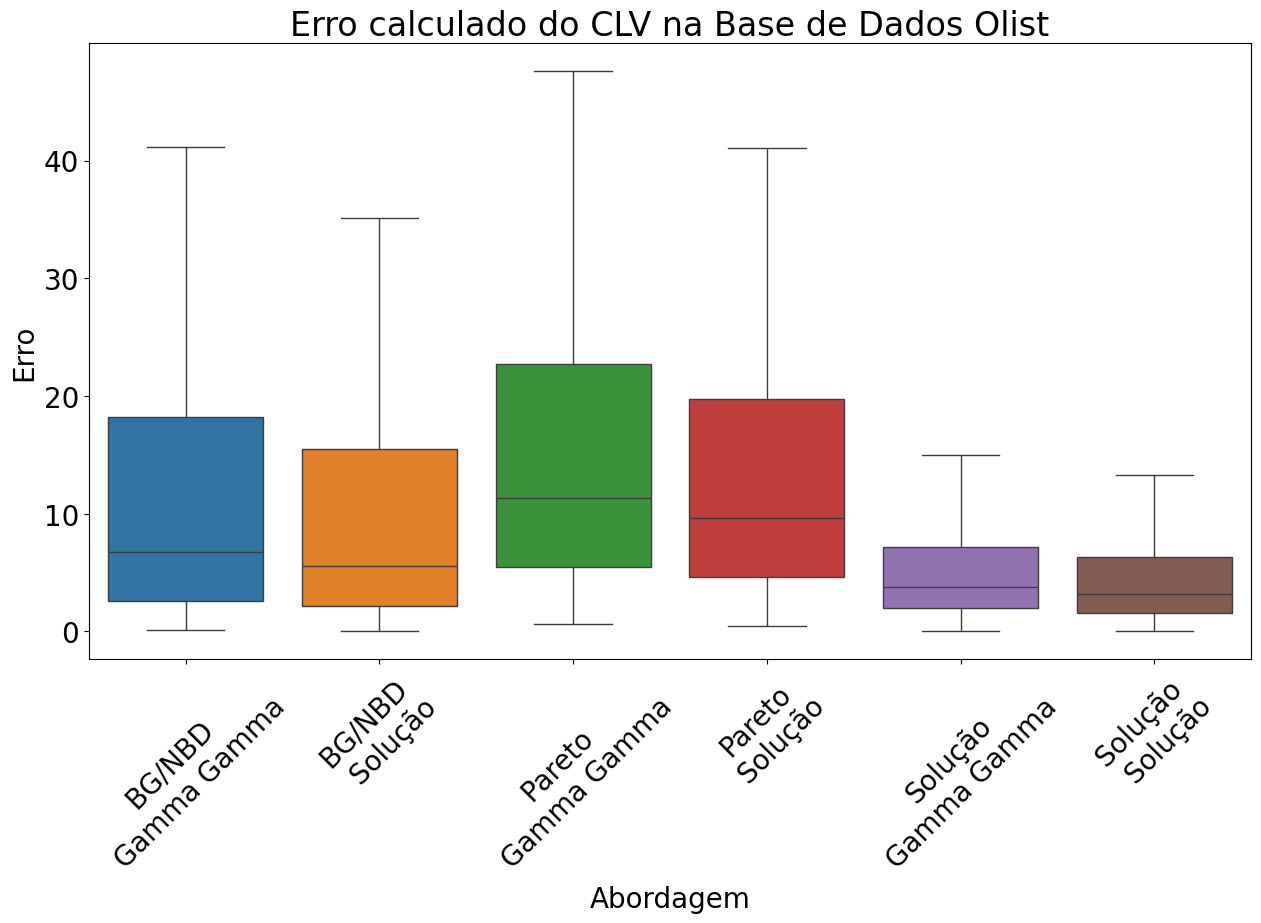

In [48]:
dadosML['LTV BG GG'] = calculaLTV(dadosML,modelBGF,'ExpectedGammaGamma',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV BG ML'] = calculaLTV(dadosML,modelBGF,'ExpectedML',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV Pareto GG'] = calculaLTV(dadosML,modeloPareto,'ExpectedGammaGamma',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV Pareto ML'] = calculaLTV(dadosML,modeloPareto,'ExpectedML',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV ML GG'] = calculaLTV(dadosML,Modelo,'ExpectedGammaGamma',teste = True,ML = True,LIFE = 1)['LTV']
dadosML['LTV ML ML'] = calculaLTV(dadosML,Modelo,'ExpectedML',teste = True,ML = True,LIFE = 1)['LTV']
dadosML['LTV Real'] = (dadosML['frequency_holdout'] * dadosML['target']) / 1.06
dadosML[dadosML < 0] = 0


dadosML['ErroLTV BG GG'] = abs(dadosML['LTV Real'] - dadosML['LTV BG GG'])
dadosML['ErroLTV ML GG'] = abs(dadosML['LTV Real'] - dadosML['LTV ML GG'])
dadosML['ErroLTV Pareto GG'] = abs(dadosML['LTV Real'] - dadosML['LTV Pareto GG'])
dadosML['ErroLTV Pareto ML'] = abs(dadosML['LTV Real'] - dadosML['LTV Pareto ML'])
dadosML['ErroLTV BG ML'] = abs(dadosML['LTV Real'] - dadosML['LTV BG ML'])
dadosML['ErroLTV ML ML'] = abs(dadosML['LTV Real'] - dadosML['LTV ML ML'])

labels = ['BG/NBD \n Gamma Gamma','BG/NBD \n Solução','Pareto \n Gamma Gamma','Pareto\n Solução','Solução\nGamma Gamma','Solução \n Solução']
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,8))
ax = sns.boxplot(data = dadosML[['ErroLTV BG GG', 'ErroLTV BG ML','ErroLTV Pareto GG' ,'ErroLTV Pareto ML','ErroLTV ML GG', 'ErroLTV ML ML']],orient = "v",showfliers = False)
plt.title("Erro calculado do CLV na Base de Dados Olist")
plt.ylabel("Erro")
ax.set_xticklabels(labels, rotation=45)
plt.xlabel("Abordagem")
plt.show()



In [49]:
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV BG GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV ML GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV Pareto GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV Pareto ML']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV BG ML']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV ML ML']))

35.00380971043808
12.328017231265152
24.34268465160659
21.733194177036285
31.42537521062453
11.543112414705753


In [50]:
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV BG GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV ML GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV Pareto GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV Pareto ML']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV BG ML']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV ML ML']))

16416.17551598046
2975.392487456786
3825.927061102217
3377.589411140221
14411.506295225552
2967.161668916451


# Dataset: Shopping Data

In [51]:
import warnings
warnings.filterwarnings('ignore')

rfm = processarRFM(arquivoShopping,'user_id','event_time','price')
rfm

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 159.97 segundos



,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente
9794320,0.0,0.0,9.0,0.0,0.0,0.00,4.0,0.981818,0.999022,0.999922,0.900000
10079204,0.0,0.0,12.0,0.0,0.0,0.00,4.0,0.989011,0.999878,0.999996,0.923077
10280338,1.0,7.0,10.0,18.1,2.0,52.45,4.0,0.848485,0.874450,0.914422,0.818182
12055855,0.0,0.0,6.0,0.0,0.0,0.00,4.0,0.964286,0.992126,0.998432,0.857143
12936739,0.0,0.0,2.0,0.0,0.0,0.00,4.0,0.833333,0.857143,0.909969,0.666667
...,...,...,...,...,...,...,...,...,...,...,...
622065819,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000
622066161,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000
622067983,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000
622069477,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000


In [52]:
dadosML = testarModelosPredicaoFrequencia(file = arquivoShopping, cID = "user_id",cDate = "event_time",cMonetary = 'price')
dadosML

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 155.88 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 156.86 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 157.28 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 157.38 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 159.29 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 159.37 segundos

Criando modelo BG/NBD
Tempo BG/NBD:  0:00:06.951584
<lifetimes.BetaGeoFitter: fitted with 552590 subjects, a: 0.01, alpha: 3.79, b: 0.02, r: 0.18>
Criando modelo Pareto
<lifetimes.ParetoNBDFitter: fitted with 552590 subjects, alpha: 12.00, beta: 18.29, r: 0.42, s: 0.00>
Tempo Pareto:  0:00:40.137243
Criando modelo ML
LassoCV  mse: 0.1706 

ElasticNet  mse: 0.2054 

RandomForestRegressor  mse: 0.1590 

GradientBoostingRegressor  mse: 0.1639 

HistGradientBoostingRegressor  m

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedML,Real Expected,ExpectedBGF,ExpectedPareto
9794320,0.0,0.0,9.0,0.0,0.0,0.00,4.0,0.981818,0.999022,0.999922,0.900000,0.062928,0.0,0.052991,0.079996
10079204,0.0,0.0,12.0,0.0,0.0,0.00,4.0,0.989011,0.999878,0.999996,0.923077,0.051248,0.0,0.043203,0.069995
10280338,1.0,7.0,10.0,18.1,2.0,52.45,4.0,0.848485,0.874450,0.914422,0.818182,0.320000,2.0,0.232325,0.258208
12055855,0.0,0.0,6.0,0.0,0.0,0.00,4.0,0.964286,0.992126,0.998432,0.857143,0.066021,0.0,0.068560,0.093332
12936739,0.0,0.0,2.0,0.0,0.0,0.00,4.0,0.833333,0.857143,0.909969,0.666667,0.099647,0.0,0.113158,0.120005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622065819,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000
622066161,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000
622067983,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000
622069477,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000


In [53]:
print("Machine Learning ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedML']))
print("BGF ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedBGF']))
print("Pareto ", mean_squared_error(dadosML['Real Expected'], dadosML['ExpectedPareto']))

Machine Learning  0.08595460590090456
BGF  0.09027719884212786
Pareto  0.08858407432688331


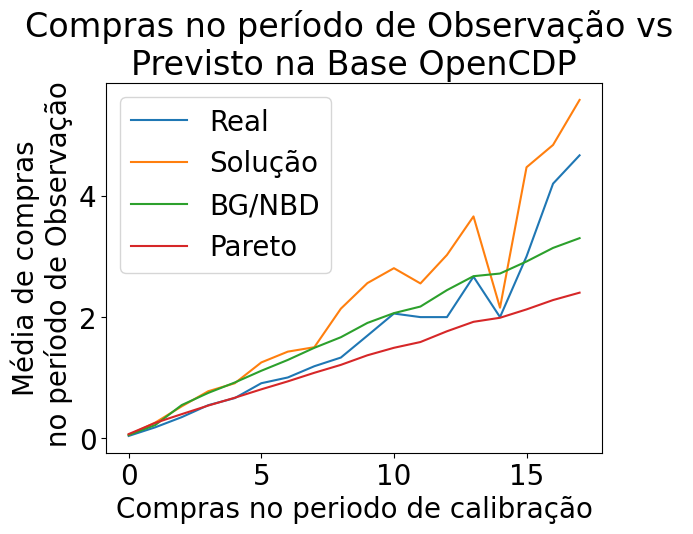

In [54]:

ax = dadosML.groupby('frequency_cal')[["Real Expected","ExpectedML" ,"ExpectedBGF","ExpectedPareto"]].mean().plot()
#ax = summary.groupby(kind)[["Real Expected", "ExpectedML"]].mean().plot()
plt.title("Compras no período de Observação vs \nPrevisto na Base OpenCDP")
plt.xlabel(x_labels['frequency_cal'])
plt.ylabel("Média de compras\n no período de Observação")
plt.legend(['Real', 'Solução', "BG/NBD","Pareto"], loc='upper left')
plt.show()

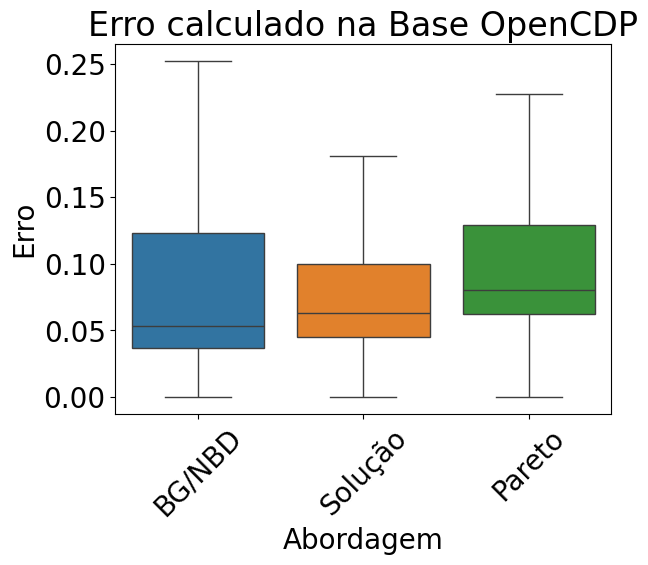

In [55]:
dadosML['Erro BG/NBD'] = abs(dadosML['Real Expected'] - dadosML['ExpectedBGF'])
dadosML['Erro Pareto'] = abs(dadosML['Real Expected'] - dadosML['ExpectedPareto'])
dadosML['Erro Machine Learning'] = abs(dadosML['Real Expected'] - dadosML['ExpectedML'])

ax = sns.boxplot(data = dadosML[['Erro BG/NBD','Erro Machine Learning', 'Erro Pareto']],orient = "v",showfliers = False)
labels = ["BG/NBD","Solução","Pareto"]
plt.title("Erro calculado na Base OpenCDP")
plt.ylabel("Erro")
plt.xlabel("Abordagem")
ax.set_xticklabels(labels, rotation=45)
plt.show()


In [56]:
dadosML = testarModelosPredicaoMonetario(file = arquivoShopping, cID = "user_id",cDate = "event_time",cMonetary = 'price')
dadosML

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 156.27 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 156.95 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 156.44 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 158.00 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 158.78 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 159.53 segundos

LassoCV  mse: 183.5625 

ElasticNet  mse: 183.6201 

RandomForestRegressor  mse: 170.0851 

GradientBoostingRegressor  mse: 177.5925 

HistGradientBoostingRegressor  mse: 249.6844 

XGBRegressor  mse: 190.9474 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008819 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightG

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,target,ExpectedML,Real Expected,ExpectedGammaGamma
10280338,1.0,7.0,10.0,18.10,2.0,52.45,4.0,0.848485,0.874450,0.914422,0.818182,41.00,27.269300,41.00,22.776332
29025780,1.0,1.0,17.0,23.62,0.0,0.00,4.0,0.993464,0.999992,1.000000,0.941176,23.62,25.166275,23.62,28.563547
34080306,1.0,6.0,13.0,10.95,0.0,0.00,4.0,0.923810,0.996032,0.999422,0.857143,10.95,11.229617,10.95,15.280212
34615712,1.0,1.0,11.0,9.59,0.0,0.00,4.0,0.961538,0.999267,0.999961,0.833333,9.59,9.748000,9.59,13.854376
37189384,1.0,7.0,13.0,20.16,0.0,0.00,4.0,0.914286,0.992126,0.998432,0.857143,20.16,20.609200,20.16,24.936054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606198852,1.0,1.0,1.0,14.02,0.0,0.00,4.0,0.000000,0.000000,0.000000,0.000000,14.02,14.476302,14.02,18.498826
606309929,1.0,1.0,1.0,49.26,0.0,0.00,4.0,0.000000,0.000000,0.000000,0.000000,49.26,66.610337,49.26,55.444740
606448485,1.0,1.0,1.0,10.87,1.0,24.81,4.0,0.000000,0.000000,0.000000,0.000000,17.84,11.035400,17.84,15.196339
606511033,1.0,1.0,1.0,38.45,0.0,0.00,4.0,0.000000,0.000000,0.000000,0.000000,38.45,44.576025,38.45,44.111444


Average absolute error: 6.270102558910333


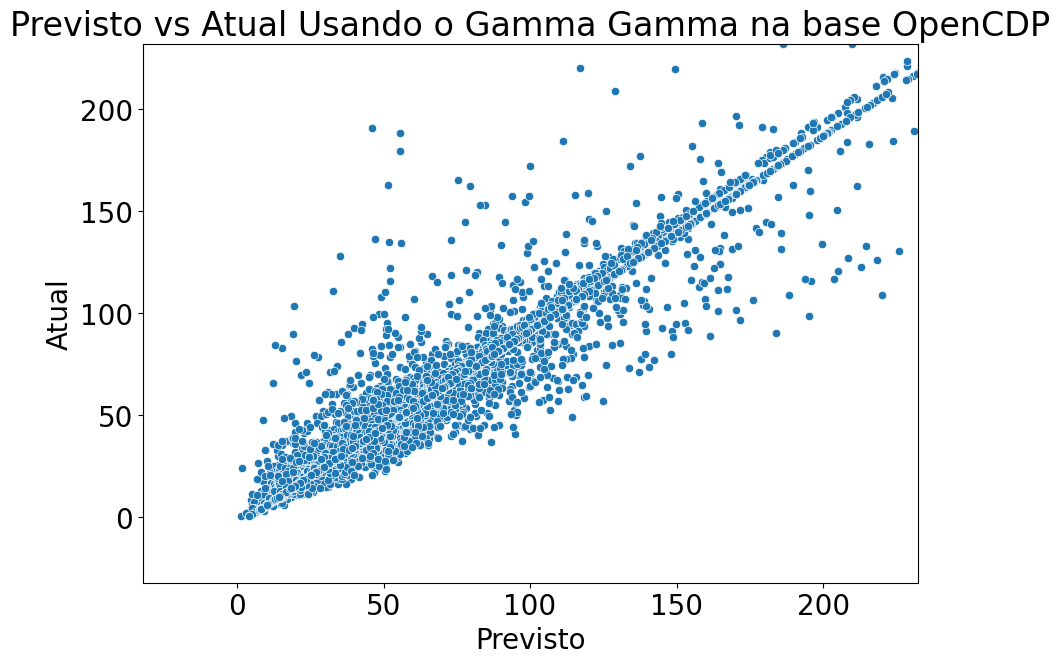

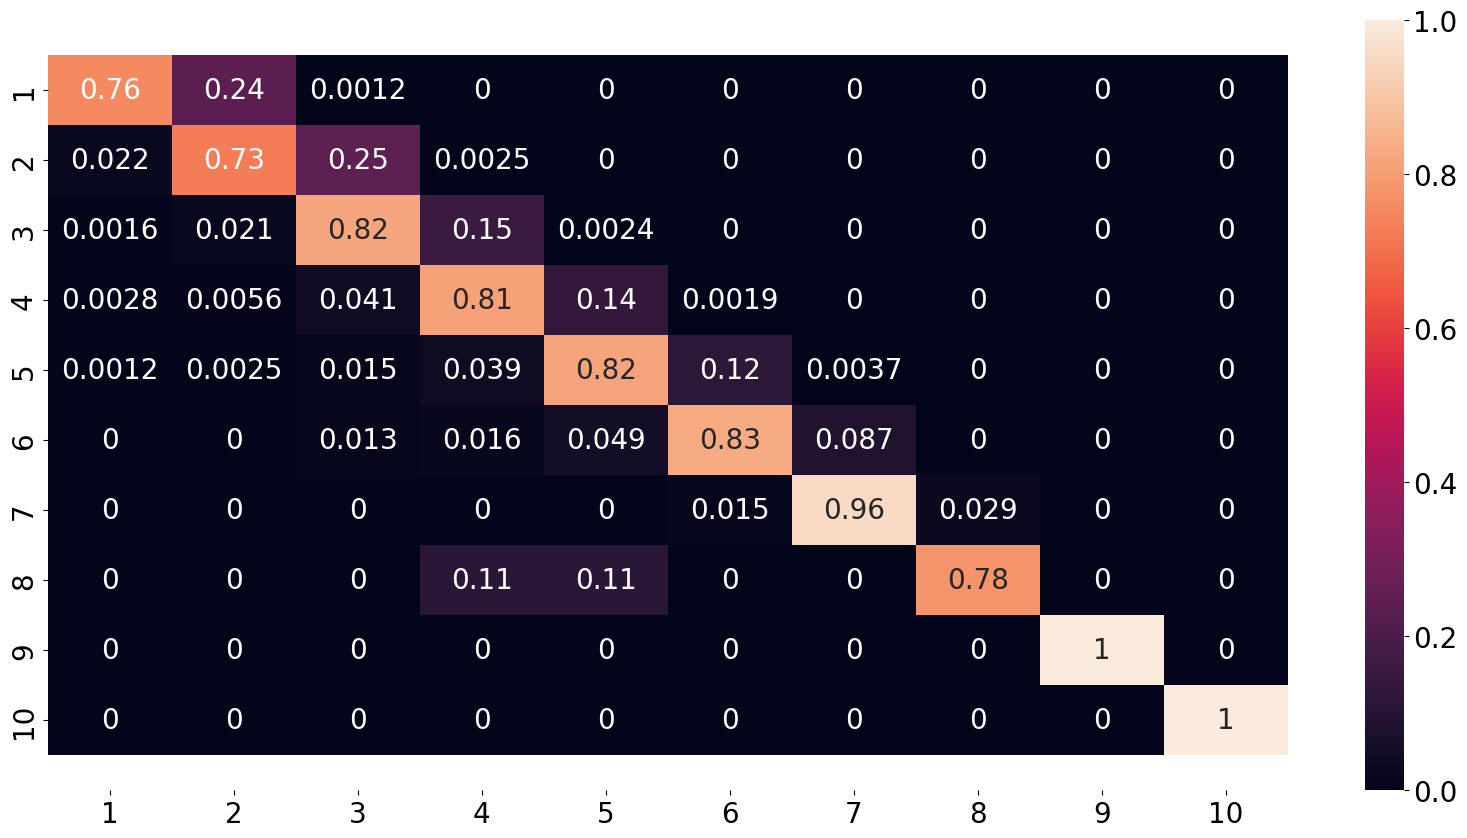

F1 score: 0.8193589748017283
Samples in each bin: 

0.0    5118
2.0    4493
1.0    4071
3.0    2136
4.0     801
5.0     309
6.0      68
7.0       9
8.0       1
9.0       1
Name: count, dtype: int64


In [57]:
evaluate_clv(dadosML['Real Expected'], dadosML['ExpectedGammaGamma'], bins=10,title = "Usando o Gamma Gamma na base OpenCDP")

Average absolute error: 2.6958775915429114


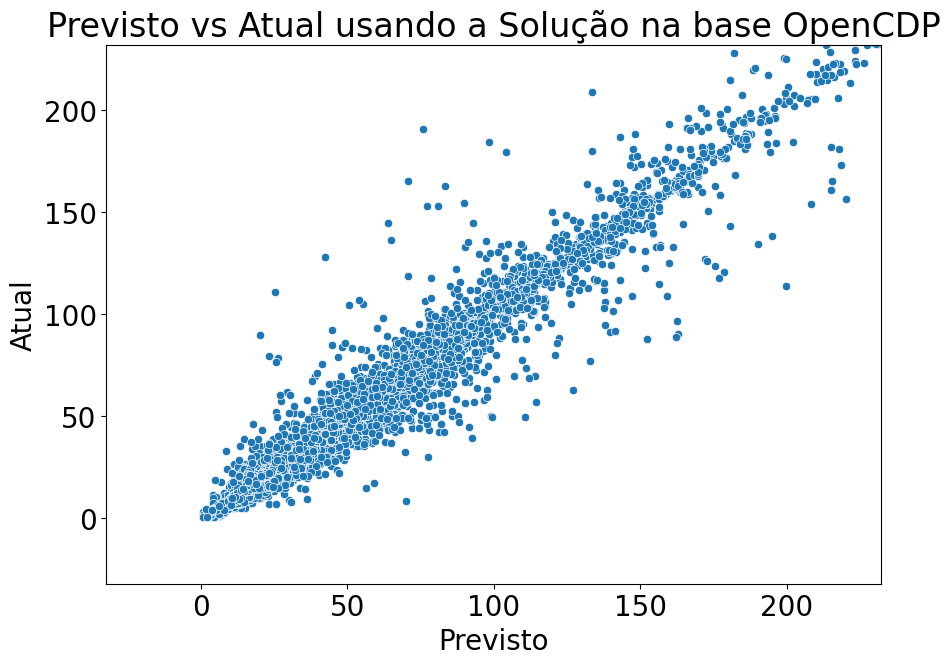

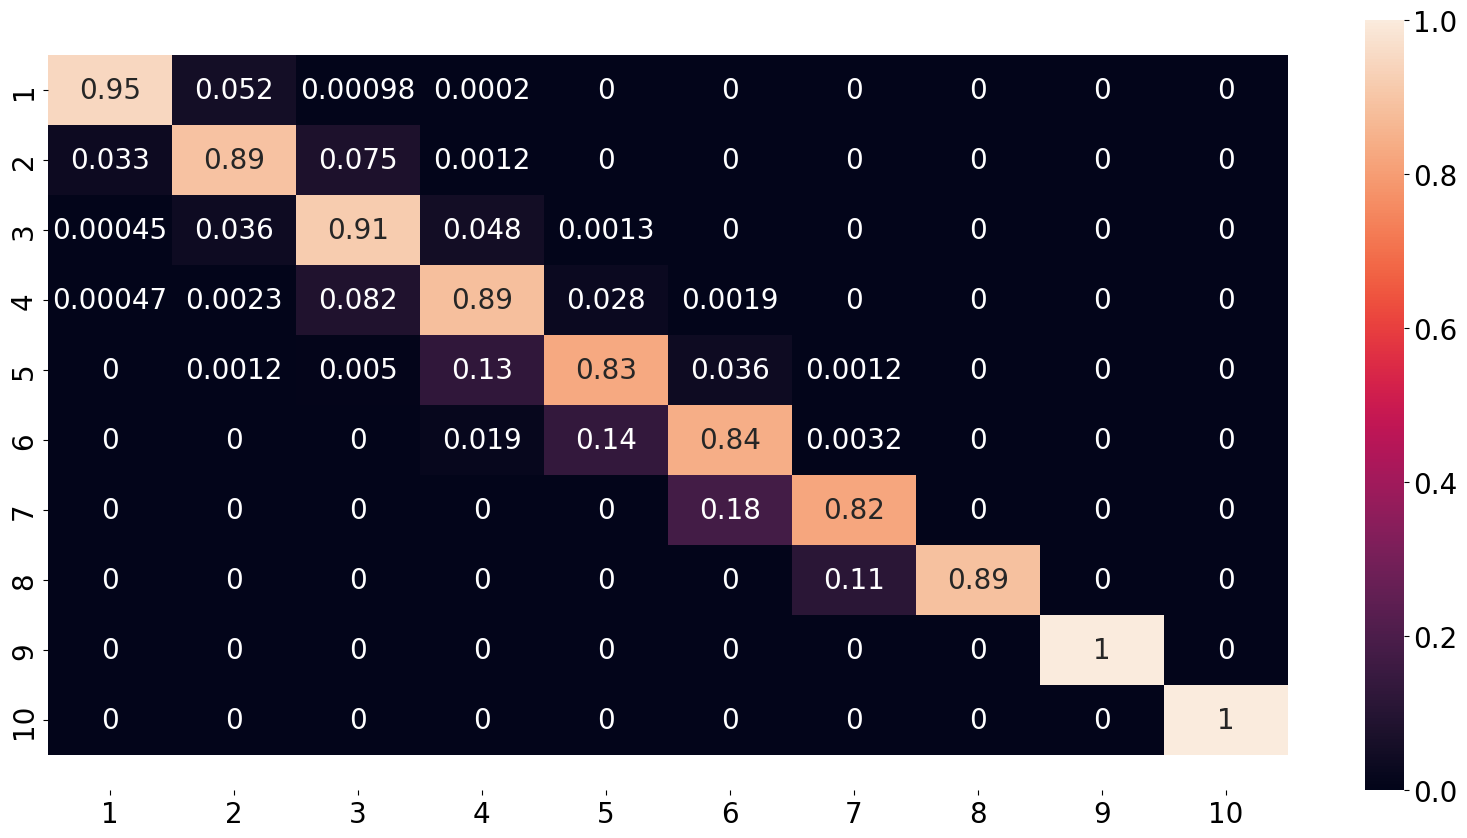

F1 score: 0.9139881709185467
Samples in each bin: 

0.0    5118
2.0    4493
1.0    4071
3.0    2136
4.0     801
5.0     309
6.0      68
7.0       9
8.0       1
9.0       1
Name: count, dtype: int64


In [58]:
evaluate_clv(dadosML['Real Expected'], dadosML['ExpectedML'], bins=10,title="usando a Solução na base OpenCDP")

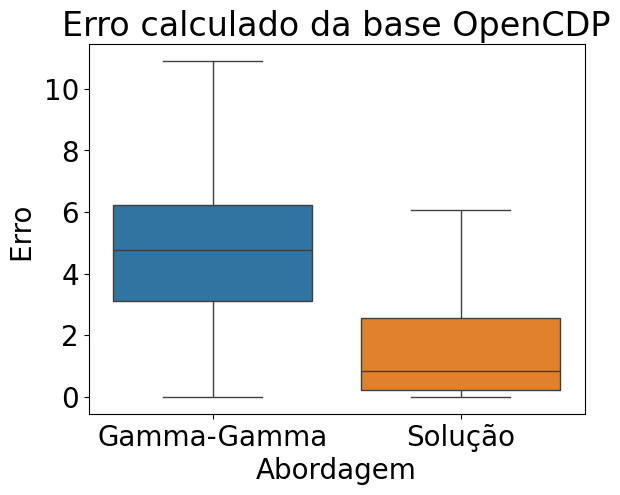

In [59]:
dadosML['Erro Gamma Gamma'] = abs(dadosML['Real Expected'] - dadosML['ExpectedGammaGamma'])
dadosML['Erro Machine Learning'] = abs(dadosML['Real Expected'] - dadosML['ExpectedML'])

ax = sns.boxplot(data = dadosML[['Erro Gamma Gamma', 'Erro Machine Learning']],orient = "v",showfliers = False)
labels = ["Gamma-Gamma","Solução"]
plt.title("Erro calculado da base OpenCDP")
plt.ylabel("Erro ")
plt.xlabel("Abordagem")
ax.set_xticklabels(labels)
plt.show()


In [60]:
dfValidacao = processarRFM(arquivoShopping, 'user_id', 'event_time', 'price',teste= True)
modelBGF = criarModeloBGF(dfValidacao,teste=True)
dfValidacao['ExpectedBGF'] = comprasEsperadas(modelBGF, dfValidacao,numPeriodos = 1,teste = True)
dfValidacao

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 160.67 segundos



,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,churnRecente,ExpectedBGF
9794320,0.0,0.0,9.0,0.0,0.0,0.00,4.0,0.981818,0.999022,0.999922,0.900000,0.013872
10079204,0.0,0.0,12.0,0.0,0.0,0.00,4.0,0.989011,0.999878,0.999996,0.923077,0.011339
10280338,1.0,7.0,10.0,18.1,2.0,52.45,4.0,0.848485,0.874450,0.914422,0.818182,0.060708
12055855,0.0,0.0,6.0,0.0,0.0,0.00,4.0,0.964286,0.992126,0.998432,0.857143,0.017866
12936739,0.0,0.0,2.0,0.0,0.0,0.00,4.0,0.833333,0.857143,0.909969,0.666667,0.029003
...,...,...,...,...,...,...,...,...,...,...,...,...
622065819,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.042158
622066161,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.042158
622067983,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.042158
622069477,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.000000,1.000000,1.000000,1.000000,0.042158


In [61]:
Modelo = prepararML(file = arquivoShopping, cID = "user_id",cDate = "event_time",cMonetary = 'price')
modelBGF = criarModeloBGF(dfValidacao,teste=True)
modeloPareto = criarModeloPareto(dfValidacao,teste=True)

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 155.88 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 155.63 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 156.95 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 157.60 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 165.04 segundos

Linear
Exponencial base 2
Exponencial base e
Recente
Tempo decorrido: 159.48 segundos

LassoCV  mse: 0.1706 

ElasticNet  mse: 0.2054 

RandomForestRegressor  mse: 0.1590 

GradientBoostingRegressor  mse: 0.1639 

HistGradientBoostingRegressor  mse: 0.1630 

XGBRegressor  mse: 0.1608 

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009636 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 382
[LightGBM] [Info] N

In [62]:
Modelo

RandomForestRegressor()

In [63]:
Modelo.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [64]:
modelBGF

<lifetimes.BetaGeoFitter: fitted with 110518 subjects, a: 0.01, alpha: 4.31, b: 0.02, r: 0.19>

In [65]:


dadosML['LTV BG GG'] = calculaLTV(dadosML,modelBGF,'ExpectedGammaGamma',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV BG ML'] = calculaLTV(dadosML,modelBGF,'ExpectedML',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV Pareto GG'] = calculaLTV(dadosML,modeloPareto,'ExpectedGammaGamma',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV Pareto ML'] = calculaLTV(dadosML,modeloPareto,'ExpectedML',teste = True,ML = False,LIFE = 1)['LTV']
dadosML['LTV ML GG'] = calculaLTV(dadosML,Modelo,'ExpectedGammaGamma',teste = True,ML = True,LIFE = 1)['LTV']
dadosML['LTV ML ML'] = calculaLTV(dadosML,Modelo,'ExpectedML',teste = True,ML = True,LIFE = 1)['LTV']
dadosML['LTV Real'] = (dadosML['frequency_holdout'] * dadosML['target']) / 1.06
dadosML[dadosML < 0] = 0
dadosML

,frequency_cal,recency_cal,T_cal,monetary_value_cal,frequency_holdout,monetary_value_holdout,duration_holdout,churnLinear,churnExponencial_2,churnExponencial_e,...,ExpectedGammaGamma,Erro Gamma Gamma,Erro Machine Learning,LTV BG GG,LTV BG ML,LTV Pareto GG,LTV Pareto ML,LTV ML GG,LTV ML ML,LTV Real
10280338,1.0,7.0,10.0,18.10,2.0,52.45,4.0,0.848485,0.874450,0.914422,...,22.776332,18.223668,13.730700,38.874611,46.543202,41.474393,49.655830,9.884069,11.833847,77.358491
29025780,1.0,1.0,17.0,23.62,0.0,0.00,4.0,0.993464,0.999992,1.000000,...,28.563547,4.943547,1.546275,18.361671,16.177783,39.232072,34.565914,0.000000,0.000000,0.000000
34080306,1.0,6.0,13.0,10.95,0.0,0.00,4.0,0.923810,0.996032,0.999422,...,15.280212,4.330212,0.279617,19.494485,14.326738,24.415618,17.943340,0.000000,0.000000,0.000000
34615712,1.0,1.0,11.0,9.59,0.0,0.00,4.0,0.961538,0.999267,0.999961,...,13.854376,4.264376,0.158000,15.312888,10.774216,24.106167,16.961205,8.234205,5.793623,0.000000
37189384,1.0,7.0,13.0,20.16,0.0,0.00,4.0,0.914286,0.992126,0.998432,...,24.936054,4.776054,0.449200,32.973853,27.252297,39.844289,32.930589,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606198852,1.0,1.0,1.0,14.02,0.0,0.00,4.0,0.000000,0.000000,0.000000,...,18.498826,4.478826,0.456302,90.647955,70.936783,57.962464,45.358671,0.000000,0.000000,0.000000
606309929,1.0,1.0,1.0,49.26,0.0,0.00,4.0,0.000000,0.000000,0.000000,...,55.444740,6.184740,17.350337,271.690344,326.404011,173.725284,208.710508,31.383815,37.703965,0.000000
606448485,1.0,1.0,1.0,10.87,1.0,24.81,4.0,0.000000,0.000000,0.000000,...,15.196339,2.643661,6.804600,74.465108,54.075673,47.614766,34.577275,0.000000,0.000000,16.830189
606511033,1.0,1.0,1.0,38.45,0.0,0.00,4.0,0.000000,0.000000,0.000000,...,44.111444,5.661444,6.126025,216.154923,218.431461,138.214612,139.670285,0.000000,0.000000,0.000000


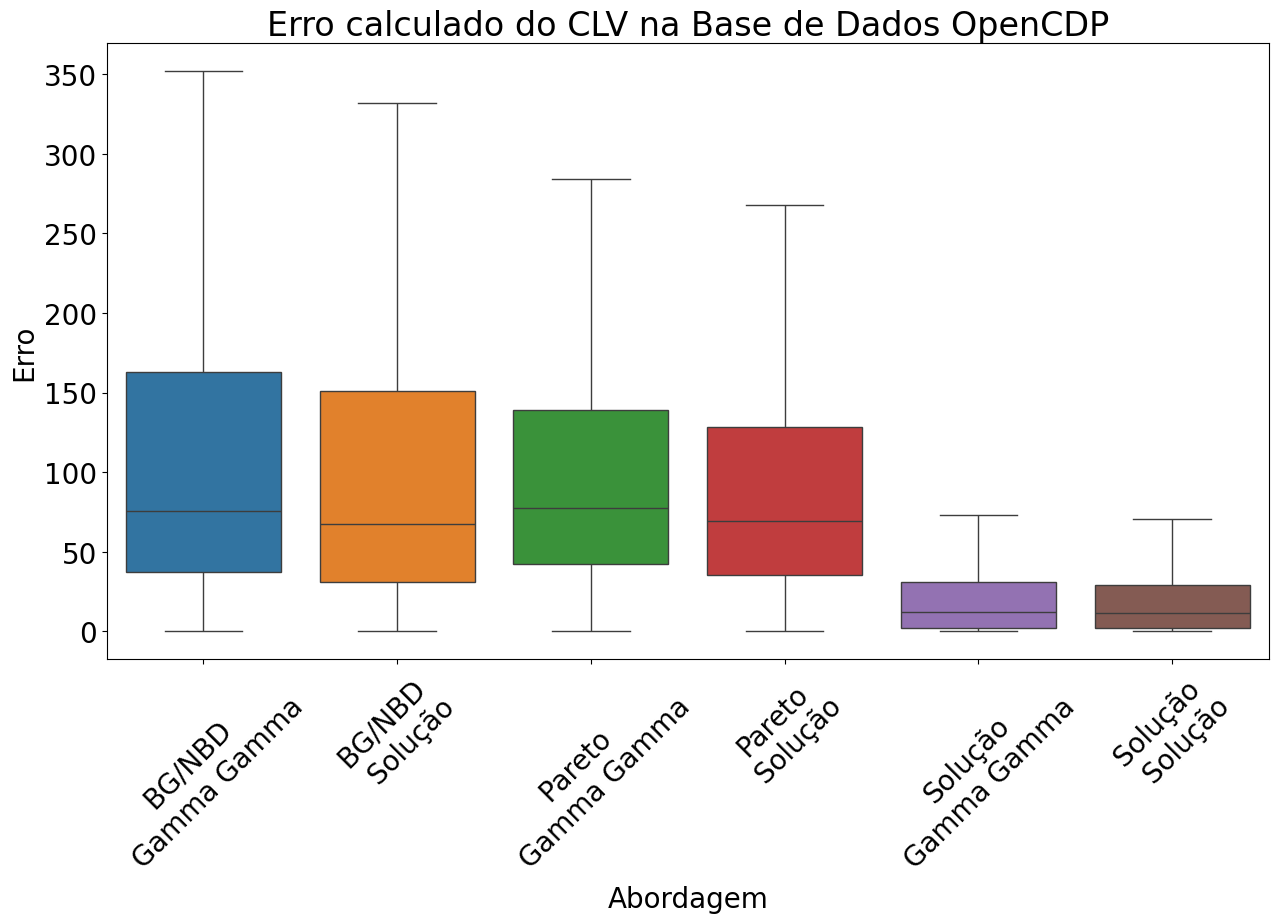

In [66]:
dadosML['ErroLTV BG GG'] = abs(dadosML['LTV Real'] - dadosML['LTV BG GG'])
dadosML['ErroLTV ML GG'] = abs(dadosML['LTV Real'] - dadosML['LTV ML GG'])
dadosML['ErroLTV Pareto GG'] = abs(dadosML['LTV Real'] - dadosML['LTV Pareto GG'])
dadosML['ErroLTV Pareto ML'] = abs(dadosML['LTV Real'] - dadosML['LTV Pareto ML'])
dadosML['ErroLTV BG ML'] = abs(dadosML['LTV Real'] - dadosML['LTV BG ML'])
dadosML['ErroLTV ML ML'] = abs(dadosML['LTV Real'] - dadosML['LTV ML ML'])

labels = ['BG/NBD \n Gamma Gamma','BG/NBD \n Solução','Pareto \n Gamma Gamma','Pareto\n Solução','Solução\nGamma Gamma','Solução \n Solução']
plt.rcParams.update({'font.size': 20})
plt.figure(figsize=(15,8))
ax = sns.boxplot(data = dadosML[['ErroLTV BG GG', 'ErroLTV BG ML','ErroLTV Pareto GG' ,'ErroLTV Pareto ML','ErroLTV ML GG', 'ErroLTV ML ML']],orient = "v",showfliers = False)
plt.title("Erro calculado do CLV na Base de Dados OpenCDP")
plt.ylabel("Erro")
ax.set_xticklabels(labels, rotation=45)
plt.xlabel("Abordagem")
plt.show()



In [67]:
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV BG GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV ML GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV Pareto GG']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV Pareto ML']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV BG ML']))
print(mean_absolute_error(dadosML['LTV Real'], dadosML['LTV ML ML']))

132.78035039727646
23.757875637555117
114.40923478932214
104.01551511913104
121.735953250178
22.685123488385265


In [68]:
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV BG GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV ML GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV Pareto GG']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV Pareto ML']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV BG ML']))
print(mean_squared_error(dadosML['LTV Real'], dadosML['LTV ML ML']))

48090.20194629748
1851.9897906659469
30248.83858836912
25664.204541252024
41056.63662853996
1709.1913773962797
